# $\color{black}{\text{Kapittel 1 - Grunnleggende regning}}$

In [9]:
#1 Grunnleggende regning: 1.1 Hoderegning
# Addisjon, subtraksjon, multiplikasjon og divisjon

# Addisjon
addition_1 = 70 + 50
addition_2 = 700 + 500

# Subtraksjon
subtraction_1 = 120 - 50
subtraction_2 = 1200 - 500

# Multiplikasjon
multiplication_1 = 42.35 * 10
multiplication_2 = 348 * 1000

# Divisjon
division_1 = 225 / 100
division_2 = 7.75 / 1000

# Utskrift av resultatene med avrunding :.0f betyr feks ingen desimaler, :.1f betyr 1 desimal osv
print(f"70 kr + 50 kr = {addition_1:.0f} kr")
print(f"700 kr + 500 kr = {addition_2:.0f} kr")
print(f"120 kr - 50 kr = {subtraction_1:.0f} kr")
print(f"1200 kr - 500 kr = {subtraction_2:.0f} kr")
print(f"42.35 * 10 = {multiplication_1:.1f}")
print(f"348 * 1000 = {multiplication_2:.0f}")
print(f"225 / 100 = {division_1:.2f}")
print(f"7.75 / 1000 = {division_2:.5f}")

70 kr + 50 kr = 120 kr
700 kr + 500 kr = 1200 kr
120 kr - 50 kr = 70 kr
1200 kr - 500 kr = 700 kr
42.35 * 10 = 423.5
348 * 1000 = 348000
225 / 100 = 2.25
7.75 / 1000 = 0.00775


In [12]:
# 1 Grunnleggende regning: 1.3 Overslagsregning
import math

def round_up(number, level):
    return math.ceil(number / level) * level

def round_down(number, level):
    return math.floor(number / level) * level

def round_nearest(number, level):
    return round(number / level) * level

def estimate(a, b, operation):
    if operation == '+':
        a_rounded = round_down(a, 10)
        b_rounded = round_up(b, 10)
        result = a_rounded + b_rounded
    elif operation == '-':
        a_rounded = round_up(a, 10)
        b_rounded = round_up(b, 10)
        result = a_rounded - b_rounded
    elif operation == '*':
        a_rounded = round_up(a, 10)
        b_rounded = round_down(b, 10)
        result = a_rounded * b_rounded
    elif operation == '/':
        a_rounded = round_down(a, 10)
        b_rounded = round_down(b, 1)
        result = a_rounded / b_rounded
    else:
        raise ValueError("Ugyldig operasjon")
    
    return a_rounded, b_rounded, result

def run_examples():
    examples = [
        (184.75, 257.20, '+'),
        (657.50, 379.45, '-'),
        (18.5, 26.3, '*'),
        (122, 3.12, '/'),
        (4.8, 14.18, '*'),
        (0.23, 18, '*'),
        (180, 47, '/')
    ]

    for a, b, op in examples:
        a_r, b_r, res = estimate(a, b, op)
        print(f"{a} {op} {b} ≈ {a_r} {op} {b_r} = {round(res)}")

def user_input():
    try:
        a = float(input("Skriv inn det første tallet: "))
        b = float(input("Skriv inn det andre tallet: "))
        op = input("Velg regneoperasjon (+, -, *, /): ")
        a_r, b_r, res = estimate(a, b, op)
        print(f"\nOverslag: {a} {op} {b} ≈ {a_r} {op} {b_r} = {round(res)}")
    except Exception as e:
        print(f"Feil: {e}")

def main():
    while True:
        print("\n--- OVERSLAGSREGNING ---")
        print("1. Kjør eksempler")
        print("2. Gjør egne beregninger")
        print("3. Avslutt")
        valg = input("Velg et alternativ (1-3): ")

        if valg == '1':
            run_examples()
        elif valg == '2':
            user_input()
        elif valg == '3':
            print("Avslutter programmet.")
            break
        else:
            print("Ugyldig valg. Prøv igjen.")

if __name__ == "__main__":
    main()


--- OVERSLAGSREGNING ---
1. Kjør eksempler
2. Gjør egne beregninger
3. Avslutt


Velg et alternativ (1-3):  1


184.75 + 257.2 ≈ 180 + 260 = 440
657.5 - 379.45 ≈ 660 - 380 = 280
18.5 * 26.3 ≈ 20 * 20 = 400
122 / 3.12 ≈ 120 / 3 = 40
4.8 * 14.18 ≈ 10 * 10 = 100
0.23 * 18 ≈ 10 * 10 = 100
180 / 47 ≈ 180 / 47 = 4

--- OVERSLAGSREGNING ---
1. Kjør eksempler
2. Gjør egne beregninger
3. Avslutt


Velg et alternativ (1-3):  2
Skriv inn det første tallet:  27.9
Skriv inn det andre tallet:  32.9
Velg regneoperasjon (+, -, *, /):  +



Overslag: 27.9 + 32.9 ≈ 20 + 40 = 60

--- OVERSLAGSREGNING ---
1. Kjør eksempler
2. Gjør egne beregninger
3. Avslutt


Velg et alternativ (1-3):  3


Avslutter programmet.


In [1]:
# 1 Grunnleggende regning: 1.5 Regne med brøk
import ipywidgets as widgets
from IPython.display import display, clear_output
from fractions import Fraction
import math
import re
import ast
import operator

# GUI-komponenter
num_terms = widgets.IntSlider(value=2, min=2, max=6, description="Antall ledd:")
confirm_button = widgets.Button(description="OK")
input_container = widgets.VBox()
calculate_button = widgets.Button(description="Beregn")
output = widgets.Output()

term_inputs = []
operator_inputs = []

# Evaluer komplekse uttrykk i brøker
def eval_expr(expr):
    expr = expr.replace('^', '**')
    expr = re.sub(r'√(\d+)', r'math.sqrt(\1)', expr)
    expr = expr.replace('sqrt', 'math.sqrt')

    ops = {
        ast.Add: operator.add,
        ast.Sub: operator.sub,
        ast.Mult: operator.mul,
        ast.Div: operator.truediv,
        ast.Pow: operator.pow,
        ast.USub: operator.neg
    }

    def _eval(node):
        if isinstance(node, ast.Expression):
            return _eval(node.body)
        elif isinstance(node, ast.BinOp):
            left = _eval(node.left)
            right = _eval(node.right)
            res = ops[type(node.op)](left, right)
            return Fraction(str(res)).limit_denominator(10**6)
        elif isinstance(node, ast.UnaryOp):
            operand = _eval(node.operand)
            return ops[type(node.op)](operand)
        elif isinstance(node, ast.Call):
            if isinstance(node.func, ast.Attribute) and node.func.attr == 'sqrt':
                val = math.sqrt(float(_eval(node.args[0])))
                return Fraction(str(val)).limit_denominator(10**6)
            else:
                raise TypeError("Ugyldig funksjon")
        elif isinstance(node, ast.Constant):
            return Fraction(str(node.value))
        elif isinstance(node, ast.Num):
            return Fraction(str(node.n))
        else:
            raise TypeError(f"Ugyldig uttrykk: {node}")

    parsed = ast.parse(expr, mode='eval')
    return _eval(parsed.body)

# Opprett felt for ledd
def create_inputs(_):
    global term_inputs, operator_inputs
    term_inputs = []
    operator_inputs = []
    children = []

    for idx in range(num_terms.value):
        term_type = widgets.Dropdown(options=["Heltall", "Desimaltall", "Brøk", "Kompleks brøk"], description=f"Ledd {idx+1}:")
        sign = widgets.Dropdown(options=['+', '-'], description="Fortegn:")

        int_input = widgets.IntText(description="Heltall")
        float_input = widgets.FloatText(description="Desimal")
        br_num = widgets.IntText(description="Teller")
        br_den = widgets.IntText(description="Nevner", value=1)
        k_num_expr = widgets.Text(description="Telleruttrykk")
        k_den_expr = widgets.Text(description="Nevneruttrykk")

        container = widgets.VBox()

        # Lager separat funksjon for å unngå referanseproblem
        def make_updater(container_ref, type_widget, sign_widget, i_widget, f_widget, bn_widget, bd_widget, kn_widget, kd_widget):
            def update_term_fields(change=None):
                if type_widget.value == "Heltall":
                    container_ref.children = [sign_widget, type_widget, i_widget]
                elif type_widget.value == "Desimaltall":
                    container_ref.children = [sign_widget, type_widget, f_widget]
                elif type_widget.value == "Brøk":
                    container_ref.children = [sign_widget, type_widget, bn_widget, bd_widget]
                elif type_widget.value == "Kompleks brøk":
                    container_ref.children = [sign_widget, type_widget, kn_widget, kd_widget]
            return update_term_fields

        updater = make_updater(container, term_type, sign, int_input, float_input, br_num, br_den, k_num_expr, k_den_expr)
        term_type.observe(updater, names="value")
        updater()

        term_inputs.append((sign, term_type, int_input, float_input, br_num, br_den, k_num_expr, k_den_expr))
        children.append(container)

        if idx < num_terms.value - 1:
            op = widgets.Dropdown(options=['+', '-', '*', '/'], description=f"Operator {idx+1}:")
            operator_inputs.append(op)
            children.append(op)

    children.append(calculate_button)
    children.append(output)
    input_container.children = children

# Konverter et ledd til Fraction
def to_fraction(sign, typ, i, f, bn, bd, kn_expr, kd_expr):
    if typ == "Heltall":
        val = Fraction(i)
    elif typ == "Desimaltall":
        val = Fraction(str(f)).limit_denominator()
    elif typ == "Brøk":
        if bd == 0:
            raise ZeroDivisionError("Nevner kan ikke være 0")
        val = Fraction(bn, bd)
    elif typ == "Kompleks brøk":
        teller = eval_expr(kn_expr)
        nevner = eval_expr(kd_expr)
        if nevner == 0:
            raise ZeroDivisionError("Nevner kan ikke være 0")
        val = teller / nevner
    else:
        raise ValueError(f"Ukjent type: {typ}")
    return val if sign == '+' else -val

# Kalkuler hele uttrykket
def calculate(_):
    with output:
        output.clear_output()
        try:
            sign, typ, i, f, bn, bd, kn_expr, kd_expr = term_inputs[0]
            result = to_fraction(sign.value, typ.value, i.value, f.value, bn.value, bd.value, kn_expr.value, kd_expr.value)
            expr_str = f"({result})"

            for idx, op_widget in enumerate(operator_inputs):
                op = op_widget.value
                sign, typ, i, f, bn, bd, kn_expr, kd_expr = term_inputs[idx + 1]
                next_val = to_fraction(sign.value, typ.value, i.value, f.value, bn.value, bd.value, kn_expr.value, kd_expr.value)
                expr_str += f" {op} ({next_val})"

                if op == '+':
                    result += next_val
                elif op == '-':
                    result -= next_val
                elif op == '*':
                    result *= next_val
                elif op == '/':
                    if next_val == 0:
                        raise ZeroDivisionError("Kan ikke dele på null")
                    result /= next_val

            desimal = round(float(result), 2)

            if abs(result.numerator) > result.denominator:
                heltall = result.numerator // result.denominator
                rest = abs(result.numerator) % result.denominator
                blandet = f"{heltall} {rest}/{result.denominator}" if rest else str(heltall)
            else:
                blandet = str(result)

            print(f"Uttrykk: {expr_str}")
            print(f"Forenklet brøk: {result}")
            print(f"Blandet tall: {blandet}")
            print(f"Desimaltall: {desimal}")

        except Exception as e:
            print(f"Feil: {e}")

# Koble knapper
confirm_button.on_click(create_inputs)
calculate_button.on_click(calculate)

# Startvisning
display(widgets.HBox([num_terms, confirm_button]))
display(input_container)

VBox()

In [21]:
# Omgjøringskalkulator mellom desimaltall, brøk og prosent
from decimal import Decimal, getcontext
from math import gcd

getcontext().prec = 10  # Sett presisjon for desimaler

def hovedmeny():
    print("Velkommen til omgjøringskalkulator mellom desimaltall, brøk og prosent ")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    print("1. Prosent til desimaltall og brøk")
    print("2. Brøk til desimaltall og prosent")
    print("3. Desimaltall til brøk og prosent")

def beregn_prosentandel(delen: float, hele: float) -> float:
    if hele == 0:
        raise ValueError("Hele kan ikke være null.")
    return (delen / hele) * 100

def decimal_to_fraction_and_percent(digits: str):
    try:
        n = Decimal(digits)
    except InvalidOperation:
        print("Ugyldig desimaltall.")
        return

    exponent = len(digits.split('.')[1]) if '.' in digits else 0
    numerator = int(n * 10**exponent)
    denominator = 10**exponent
    percent = float(n * 100)
    factor = gcd(numerator, denominator)
    num = numerator // factor
    den = denominator // factor

    print(f"Desimaltallet er {round(n, 3)}")
    print(f"Brøken er {num} / {den}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def percent_to_decimal_and_fraction(percent: float):
    decimal = percent / 100
    digits = str(decimal)
    decimal_to_fraction_and_percent(digits)

def fraction_to_decimal_and_percent(numerator: int, denominator: int):
    if denominator == 0:
        print("Nevneren kan ikke være null.")
        return
    decimal = Decimal(numerator) / Decimal(denominator)
    percent = float(decimal * 100)

    print(f"Desimaltallet er {round(decimal, 3)}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def main():
    while True:
        hovedmeny()
        choice = input("Velg et alternativ (1/2/3): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break
        elif choice == '1':
            percent = float(input("Skriv inn prosentverdien: "))
            percent_to_decimal_and_fraction(percent)
        elif choice == '2':
            numerator = int(input("Skriv inn telleren til brøken, altså det øverste tallet: "))
            denominator = int(input("Skriv inn nevneren til brøken, altså det nederste tallet: "))
            fraction_to_decimal_and_percent(numerator, denominator)
        elif choice == '3':
            digits = input("Skriv inn ett desimaltall, husk punktum, for å konvertere til brøk og prosent: ")
            decimal_to_fraction_and_percent(digits)
        else:
            print("Ugyldig valg. Vennligst prøv igjen.")
        
        restart = input("Vil du starte på nytt? (ja/nei): ").strip().lower()
        if restart == 'q':
            print("Programmet avsluttes.")
            break
        elif restart != 'ja':
            break

if __name__ == "__main__":
    main()

Velkommen til omgjøringskalkulator mellom desimaltall, brøk og prosent 
Trykk 'q' når som helst for å avslutte programmet og trykk enter.

Hva vil du beregne?
1. Prosent til desimaltall og brøk
2. Brøk til desimaltall og prosent
3. Desimaltall til brøk og prosent


Velg et alternativ (1/2/3):  q


Programmet avsluttes.


In [ ]:
# Forholdskalkulator med saft og vann som eksempel
from fractions import Fraction

# 🔧 Konverteringsfunksjon for mengde-input
def les_mengde(prompt):
    while True:
        tekst = input(f"{prompt} (f.eks. 1.5l, 15dl, 100cl, 250ml, 1/2l) eller q for å avslutte: ").strip().lower()
        if tekst == "q":
            print("\n📤 Programmet avsluttes. Takk for at du brukte kalkulatoren! 🧃")
            return None
        try:
            if tekst.endswith("l") and not tekst.endswith("ml"):
                mengde = Fraction(tekst[:-1]) * 10         # liter til dl
            elif tekst.endswith("dl"):
                mengde = Fraction(tekst[:-2])              # dl
            elif tekst.endswith("cl"):
                mengde = Fraction(tekst[:-2]) / 10         # cl til dl
            elif tekst.endswith("ml"):
                mengde = Fraction(tekst[:-2]) / 100        # ml til dl
            else:
                mengde = Fraction(tekst)                   # tolkes som dl
            return float(mengde)
        except:
            print("❌ Ugyldig mengde. Prøv igjen.")

# 📦 Les forhold saft:vann
def les_forhold():
    while True:
        forhold = input("Oppgi forhold mellom saft og vann (f.eks. 1:5 eller 1/6:5) eller q for å avslutte: ").strip()
        if forhold.lower() == "q":
            print("\n📤 Programmet avsluttes.")
            return None
        try:
            saft_del, vann_del = forhold.split(":")
            saft = Fraction(saft_del)
            vann = Fraction(vann_del)
            return saft, vann
        except:
            print("❌ Ugyldig format. Bruk f.eks. 1:5 eller 1/3:2")

# 🧾 Vis resultat i flere enheter
def vis_resultat(saft_dl, vann_dl):
    total_dl = saft_dl + vann_dl
    print(f"\n🧮 Resultat:")
    print(f"- Saft: {saft_dl:.2f} dl ({saft_dl/10:.2f} l, {saft_dl*10:.0f} cl, {saft_dl*100:.0f} ml)")
    print(f"- Vann: {vann_dl:.2f} dl ({vann_dl/10:.2f} l, {vann_dl*10:.0f} cl, {vann_dl*100:.0f} ml)")
    print(f"- Totalt: {total_dl:.2f} dl ({total_dl/10:.2f} l)")

# 🔢 Kalkulasjoner
def beregn_fra_totalmengde():
    forhold = les_forhold()
    if forhold is None:
        return
    saft, vann = forhold
    total = les_mengde("Hvor mye ferdig drikke ønsker du")
    if total is None:
        return
    total_deler = saft + vann
    saft_dl = (saft / total_deler) * total
    vann_dl = (vann / total_deler) * total
    vis_resultat(saft_dl, vann_dl)

def beregn_fra_saftmengde():
    forhold = les_forhold()
    if forhold is None:
        return
    saft, vann = forhold
    saft_dl = les_mengde("Hvor mye saft har du")
    if saft_dl is None:
        return
    faktor = saft_dl / float(saft)
    vann_dl = float(vann) * faktor
    vis_resultat(saft_dl, vann_dl)

def beregn_fra_vannmengde():
    forhold = les_forhold()
    if forhold is None:
        return
    saft, vann = forhold
    vann_dl = les_mengde("Hvor mye vann har du")
    if vann_dl is None:
        return
    faktor = vann_dl / float(vann)
    saft_dl = float(saft) * faktor
    vis_resultat(saft_dl, vann_dl)

def beregn_fra_prosent():
    prosent_saft = input("Hvor mange prosent av drikken skal være saft? (f.eks. 20) eller q for å avslutte: ")
    if prosent_saft.lower() == "q":
        print("\n📤 Programmet avsluttes.")
        return
    try:
        prosent_saft = float(prosent_saft)
        total = les_mengde("Hvor mye ferdig drikke ønsker du")
        if total is None:
            return
        saft_dl = (prosent_saft / 100) * total
        vann_dl = total - saft_dl
        vis_resultat(saft_dl, vann_dl)
    except:
        print("❌ Ugyldig prosent. Prøv igjen.")

# 💰 Fordeling av beløp etter brøk
def fordel_beløp():
    print("\n💰 Fordeling av beløp mellom tre personer der to får oppgitt brøk og siste får resten.")
    try:
        total = float(input("Hvor mye penger skal fordeles totalt?: "))
        andel1 = Fraction(input("Hvor stor andel skal første person ha?: "))
        andel2 = Fraction(input("Hvor stor andel skal andre person ha?: "))
        if andel1 + andel2 > 1:
            print("❌ Summen av andelene er mer enn 1. Prøv igjen.")
            return
        andel3 = 1 - andel1 - andel2
        beløp1 = total * float(andel1)
        beløp2 = total * float(andel2)
        beløp3 = total * float(andel3)
        print(f"\n📊 Fordeling:")
        print(f"- Person 1 ({andel1}): {beløp1:.2f} kr")
        print(f"- Person 2 ({andel2}): {beløp2:.2f} kr")
        print(f"- Person 3 ({andel3}): {beløp3:.2f} kr")
    except:
        print("❌ Ugyldig input. Prøv igjen.")

# 🧃 Hovedmeny
def hovedprogram():
    while True:
        print("\n🧃 Forholdskalkulator for saft og vann 🧃")
        print("1. Beregn saft og vann fra forhold og total mengde")
        print("2. Beregn vann og total mengde fra forhold og saftmengde")
        print("3. Beregn saft og total mengde fra forhold og vannmengde")
        print("4. Beregn mengder fra ønsket prosent saft og total mengde")
        print("5. Fordel et pengebeløp etter brøker")
        print("6. Avslutt")
        valg = input("Velg et alternativ (1-6) eller q for å avslutte: ").strip().lower()

        if valg == "1":
            beregn_fra_totalmengde()
        elif valg == "2":
            beregn_fra_saftmengde()
        elif valg == "3":
            beregn_fra_vannmengde()
        elif valg == "4":
            beregn_fra_prosent()
        elif valg == "5":
            fordel_beløp()
        elif valg == "6" or valg == "q":
            print("\n📤 Programmet avsluttes. Takk for at du brukte kalkulatoren! 🧃")
            return
        else:
            print("❌ Ugyldig valg. Prøv igjen.")

        nytt = input("\n🔁 Vil du gjøre en ny beregning? (j/n): ").strip().lower()
        if nytt != "j":
            print("\n📤 Programmet avsluttes. Ha en fin dag!")
            return

# ▶️ Start programmet i Jupyter
hovedprogram()

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# 1.6 Prosent Finn % av ett tall. Formel: p % av ett tall = p/100 * tallet
while True:
    user_input = input("Skriv inn prosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        prosent = float(user_input)
        hele_tallet = float(input("Skriv inn hele tallet: "))
        prosentdelen = prosent / 100 * hele_tallet
        print(f"{prosent}% av {hele_tallet} er {round(prosentdelen, 2)}")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Hvor mange prosent delen av ett tall er av det hele tallet er, feks 10 er ...% av 30
from dataclasses import dataclass

@dataclass
class Prosentandel:
    delen: float
    hele: float

    def beregn(self) -> float:
        if self.hele == 0:
            raise ValueError("Hele kan ikke være null.")
        return (self.delen / self.hele) * 100

def main():
    print("Velkommen til programmet som regner ut hvor mange prosent ett tall er av ett annet tall")
    print("Trykk 'q' når som helst for å avslutte programmet.\n")

    while True:
        delen_input = input("Skriv inn delen av tallet (eller 'q' for å avslutte): ").strip().lower()
        if delen_input == 'q':
            print("Programmet avsluttes.")
            break

        hele_input = input("Skriv inn det hele tallet (eller 'q' for å avslutte): ").strip().lower()
        if hele_input == 'q':
            print("Programmet avsluttes.")
            break

        try:
            delen = float(delen_input)
            hele = float(hele_input)
            prosentandel = Prosentandel(delen=delen, hele=hele)
            prosent = prosentandel.beregn()
            print(f"{prosentandel.delen} er {prosent:.2f}% av {prosentandel.hele}.")
        except ValueError as e:
            print(e)
        except Exception as e:
            print(f"Ugyldig input: {e}")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Regel 1. Del av tallet = (Hele tallet ∙ Prosenten) / 100
def beregn_hele_tallet(prosent, kroner):
    return kroner * 100 / prosent

def beregn_prosent(hele_tallet, kroner):
    return (kroner / hele_tallet) * 100

def beregn_del_av_tallet(hele_tallet, prosent):
    return hele_tallet * prosent / 100

def hovedprogram():
    print("Velkommen til kalkulatoren for: Del av tallet = (Hele tallet ∙ Prosenten) / 100")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva ønsker du å beregne?")
    
    print("1: Hele tallet")
    print("2: Prosent")
    print("3: Del av tallet")
    
    while True:
        valg = input("Skriv inn nummeret på det du ønsker å beregne (1, 2, eller 3): ")
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                prosent = float(input("Skriv inn prosentverdien: "))
                kroner = float(input("Skriv inn del av hele tallet: "))
                hele_tallet = beregn_hele_tallet(prosent, kroner)
                print(f"Hele tallet er: {hele_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                kroner = float(input("Skriv inn del av tallet: "))
                prosent = beregn_prosent(hele_tallet, kroner)
                print(f"Prosentverdien er: {prosent:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                prosent = float(input("Skriv inn prosentverdien: "))
                del_av_tallet = beregn_del_av_tallet(hele_tallet, prosent)
                print(f"Del av tallet er: {del_av_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg 1, 2, eller 3.")

# Kjør hovedprogrammet
hovedprogram()

In [ ]:
# 1 Grunnleggende regning: 1.6 Prosent
# Finn endringen i prosentpoeng mellom to tall
while True:
    user_input = input("Skriv inn startprosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        startprosent = float(user_input)
        sluttprosent = float(input("Skriv inn sluttprosent: "))
        prosentpoeng = sluttprosent - startprosent
        prosent = prosentpoeng / startprosent * 100
        print(f"Endringen i prosentpoeng er: {round(prosentpoeng, 2)}")
        print(f"Endringen i prosent er: {round(prosent, 2)}%")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 2. Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %
def beregn_prosentendring(ny_verdi=None, opprinnelig_verdi=None, endring_i_prosent=None):
    try:
        if endring_i_prosent is not None and opprinnelig_verdi is not None:
            ny_verdi = opprinnelig_verdi * (1 + endring_i_prosent / 100)
            return ny_verdi
        elif ny_verdi is not None and opprinnelig_verdi is not None:
            endring_i_prosent = ((ny_verdi - opprinnelig_verdi) / opprinnelig_verdi) * 100
            return endring_i_prosent
        elif ny_verdi is not None and endring_i_prosent is not None:
            opprinnelig_verdi = ny_verdi / (1 + endring_i_prosent / 100)
            return opprinnelig_verdi
        else:
            return "Ugyldig input. Vennligst oppgi to av de tre verdiene."
    except ZeroDivisionError:
        return "Opprinnelig verdi kan ikke være null."
    except Exception as e:
        return f"En feil oppstod: {e}"

def hovedmeny():
    print("Velkommen til kalkulatoren for: Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    
    print("1: Endringen i prosent")
    print("2: Ny verdi")
    print("3: Opprinnelig verdi")
    
    valg = input("Velg et alternativ (1, 2, 3): ")
    return valg
def hovedprogram():
    while True:
        valg = hovedmeny()
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                prosentendring = beregn_prosentendring(ny_verdi=ny_verdi, opprinnelig_verdi=opprinnelig_verdi)
                print(f"Endringen i prosent: {prosentendring:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                if opprinnelig_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                ny_verdi = beregn_prosentendring(opprinnelig_verdi=opprinnelig_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Ny verdi: {ny_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                opprinnelig_verdi = beregn_prosentendring(ny_verdi=ny_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Opprinnelig verdi: {opprinnelig_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg enten 1, 2 eller 3.")

if __name__ == "__main__":
    hovedprogram()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3.1 Vekstfaktor - Prosentvis økning. VF = 1 + Prosenten som desimaltall
def beregn_vekstfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis økning.
    
    Args:
    prosent (float): Prosentvis økning
    
    Returns:
    float: Vekstfaktoren
    """
    return 1 + prosent / 100

def main():
    print("Dette programmet regner ut vekstfaktoren ved en økning på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        vekstfaktor = beregn_vekstfaktor(prosent)
        print(f"Vekstfaktoren ved en økning på {prosent:.2f} % er {vekstfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3.2 Vekstfaktor - Prosentvis nedgang. VF = 1 - Prosenten som desimaltall
def beregn_nedgangsfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis nedgang.
    
    Args:
    prosent (float): Prosentvis nedgang
    
    Returns:
    float: Nedgangsfaktoren, avrundet til tre desimaler
    """
    nedgangsfaktor = 1 - prosent / 100
    return round(nedgangsfaktor, 3)

def main():
    print("Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        nedgangsfaktor = beregn_nedgangsfaktor(prosent)
        print(f"Vekstfaktoren ved en nedgang på {prosent:.2f} prosent er {nedgangsfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

In [ ]:
# 1 Grunnleggende regning: 1.7 Prosentvis endring
# Regel 3. Ny verdi = Opprinnelig verdi * Vekstfaktor
import sys  # for exit() hvis ønskelig

def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif ny_verdi is not None and vekstfaktor is not None:
        return ny_verdi / vekstfaktor
    elif ny_verdi is not None and opprinnelig_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    else:
        return None

def få_input(prompt):
    verdi_input = input(prompt)
    if verdi_input.strip().lower() == 'q':
        print("Programmet avsluttes.")
        return None
    try:
        return float(verdi_input)
    except ValueError:
        print("Ugyldig tall. Prøv igjen.")
        return få_input(prompt)

def hovedprogram():
    print("Velkommen til kalkulatoren for:  Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Formel: Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Skriv 'q' for å avslutte og trykk enter.\n")

    print("Hva vil du finne?")
    print("1: Ny verdi")
    print("2: Opprinnelig verdi")
    print("3: Vekstfaktor")

    valg = input("Skriv 1, 2 eller 3: ").strip()
    if valg.lower() == 'q':
        print("Programmet avsluttes.")
        return

    if valg == '1':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
        print(f"\nNy verdi = {ny_verdi:.2f}")

    elif valg == '2':
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
        print(f"\nOpprinnelig verdi = {opprinnelig_verdi:.2f}")

    elif valg == '3':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
        prosent_endring = (vekstfaktor - 1) * 100
        print(f"\nVekstfaktor = {vekstfaktor:.3f} ({prosent_endring:+.1f} % endring)")

    else:
        print("Ugyldig valg. Vennligst start programmet på nytt.")

if __name__ == "__main__":
    hovedprogram()

# $\color{green}{\text{Kapittel 2 - Personlig økonomi}}$

In [ ]:
# 2 Personlig økonomi: 2.1 Regneark
import pandas as pd
import matplotlib.pyplot as plt

# Data for den første måneden
data_måned1 = {
    'Tur': ['A', 'B', 'C'],
    'Pris per deltaker (kr)': [250, 300, 500],
    'Antall deltakere': [32, 42, 16]
}

# Data for den andre måneden
data_måned2 = {
    'Tur': ['A', 'B', 'C'],
    'Pris per deltaker (kr)': [250, 300, 500],
    'Antall deltakere': [35, 0, 12]
}

# Opprett DataFrames
df_måned1 = pd.DataFrame(data_måned1)
df_måned2 = pd.DataFrame(data_måned2)

# Beregn omsetning per tur for hver måned
df_måned1['Omsetning (kr)'] = df_måned1['Pris per deltaker (kr)'] * df_måned1['Antall deltakere']
df_måned2['Omsetning (kr)'] = df_måned2['Pris per deltaker (kr)'] * df_måned2['Antall deltakere']

# Beregn total omsetning for hver måned
total_omsetning_måned1 = df_måned1['Omsetning (kr)'].sum()
total_omsetning_måned2 = df_måned2['Omsetning (kr)'].sum()

# Legg til total rad
df_måned1.loc[len(df_måned1)] = ['Totalt', '', '', total_omsetning_måned1]
df_måned2.loc[len(df_måned2)] = ['Totalt', '', '', total_omsetning_måned2]

# Plot tabellene
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Første måned
axs[0].axis('tight')
axs[0].axis('off')
table1 = axs[0].table(cellText=df_måned1.values, colLabels=df_måned1.columns, cellLoc='center', loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
axs[0].set_title('Omsetning per tur for den første måneden', fontsize=14)

# Andre måned
axs[1].axis('tight')
axs[1].axis('off')
table2 = axs[1].table(cellText=df_måned2.values, colLabels=df_måned2.columns, cellLoc='center', loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
axs[1].set_title('Omsetning per tur for den andre måneden', fontsize=14)

plt.tight_layout()
plt.show()

In [2]:
# 2 Personlig økonomi: 2.2 Lønn og skatt
def eval_input(prompt, allow_exit=False):
    while True:
        user_input = input(prompt)
        if user_input.lower() in ['q', 'quit']:
            print("Avslutter programmet.")
            exit()
        try:
            return float(user_input)
        except ValueError:
            print("Ugyldig input. Prøv igjen." + (" Eller skriv 'q' for å avslutte." if allow_exit else ""))


def velg_lønnstype():
    print("\nVelg lønnstype:")
    print("1. Fast månedslønn")
    print("2. Timelønn")
    print("q. Avslutt")

    lønnstype = input("Ditt valg: ").strip().lower()
    if lønnstype == '1':
        fastlønn = eval_input("Skriv inn fast månedslønn (kr): ", allow_exit=True)
        timelønn = 0
        periode = "måned"
    elif lønnstype == '2':
        timelønn = eval_input("Skriv inn timelønn (kr): ", allow_exit=True)
        periodevalg = input("Hvilken periode gjelder timene for? (1. Uke, 2. Måned, 3. År): ").strip().lower()
        fastlønn = 0
        periode = {"1": "uke", "2": "måned", "3": "år"}.get(periodevalg, "måned")
    elif lønnstype == 'q':
        print("Avslutter programmet.")
        return None, None, None
    else:
        print("Ugyldig valg.")
        return velg_lønnstype()

    return fastlønn, timelønn, periode


def hent_overtid(timelønn):
    tillegg_sum = 0
    detaljer = []

    har_overtid = input("\nHar du jobbet overtid? (j/n): ").strip().lower()
    if har_overtid not in ['j', 'ja']:
        return 0, detaljer

    if timelønn == 0:
        timelønn = eval_input("Skriv inn timelønn (kr) for beregning av overtid: ", allow_exit=True)

    antall = int(eval_input("Hvor mange forskjellige overtidstillegg har du (f.eks. 20%, 50%, 100%)? ", allow_exit=True))
    for i in range(1, antall + 1):
        prosent = eval_input(f"Prosenttillegg for overtidstype {i} (f.eks. 50 for 50%): ", allow_exit=True)
        timer = eval_input(f"Antall timer med {prosent}% tillegg: ", allow_exit=True)
        lønn = timelønn * (1 + prosent / 100) * timer
        tillegg_sum += lønn
        detaljer.append((prosent, timer, lønn))

    return tillegg_sum, detaljer


def beregn_tabellkort(fastlønn):
    nærmeste_100 = int(fastlønn // 100 * 100)
    tabell = {
        25400: 5098, 25500: 5138, 25600: 5177, 25700: 5217, 25800: 5257, 25900: 5296, 
        26000: 5336, 26100: 5376, 26200: 5415, 26300: 5455, 26400: 5495, 26500: 5535, 
        26600: 5574, 26700: 5614, 26800: 5654, 26900: 5693, 27000: 5733, 27100: 5773, 
        27200: 5812, 27300: 5852, 27400: 5892, 27500: 5932, 27600: 5971, 27700: 6011, 
        27800: 6051, 27900: 6090, 28000: 6130, 28100: 6170, 28200: 6210, 28300: 6249, 
        28400: 6289, 28500: 6329, 28600: 6368, 28700: 6408, 28800: 6448, 28900: 6488, 
        29000: 6527, 29100: 6567, 29200: 6607, 29300: 6646, 29400: 6686, 29500: 6726, 
        29600: 6766, 29700: 6805, 29800: 6845, 29900: 6885, 30000: 6924, 30100: 6964, 
        30200: 7004, 30300: 7044, 30400: 7083, 30500: 7123, 30600: 7163, 30700: 7202, 
        30800: 7242, 30900: 7282, 31000: 7321, 31100: 7361, 31200: 7401, 31300: 7441, 
        31400: 7480, 31500: 7520, 31600: 7560, 31700: 7599, 31800: 7639, 31900: 7679, 
        32000: 7718, 32100: 7758, 32200: 7798, 32300: 7838, 32400: 7877, 32500: 7917, 
        32600: 7957, 32700: 7996, 32800: 8036, 32900: 8076, 33000: 8115, 33100: 8155, 
        33200: 8195, 33300: 8235, 33400: 8274, 33500: 8314, 33600: 8354, 33700: 8394, 
        33800: 8433, 33900: 8473, 34000: 8513, 34100: 8552, 34200: 8592, 34300: 8632, 
        34400: 8671, 34500: 8711, 34600: 8751, 34700: 8791, 34800: 8830, 34900: 8870, 
        35000: 8910, 35100: 8949, 35200: 8989, 35300: 9029, 35400: 9069, 35500: 9108, 
        35600: 9148, 35700: 9188, 35800: 9227, 35900: 9267, 36000: 9307, 36100: 9346, 
        36200: 9386, 36300: 9426, 36400: 9466, 36500: 9505, 36600: 9545, 36700: 9585, 
        36800: 9624, 36900: 9664, 37000: 9704, 37100: 9744, 37200: 9783, 37300: 9823, 
        37400: 9863, 37500: 9902, 37600: 9942, 37700: 9982, 37800: 10022, 37900: 10061, 
        38000: 10101, 38100: 10141, 38200: 10180, 38300: 10220, 38400: 10260, 38500: 10300, 
        38600: 10339, 38700: 10379, 38800: 10419, 38900: 10458, 39000: 10498, 39100: 10538, 
        39200: 10577, 39300: 10617, 39400: 10657, 39500: 10697, 39600: 10736, 39700: 10776, 
        39800: 10816, 39900: 10855, 40000: 10895, 40100: 10935, 40200: 10974, 40300: 11014, 
        40400: 11054, 40500: 11094, 40600: 11133, 40700: 11173, 40800: 11213, 40900: 11252, 
        41000: 11292, 41100: 11332, 41200: 11372, 41300: 11411, 41400: 11451, 41500: 11491, 
        41600: 11530, 41700: 11570, 41800: 11610, 41900: 11650, 42000: 11689, 42100: 11729,
    }
    return tabell.get(nærmeste_100, fastlønn * 0.25)


def beregn_prosentkort():
    return eval_input("Skriv inn prosentsats for forskuddstrekk (f.eks. 34): ", allow_exit=True) / 100


def generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt_fast, skatt_tillegg, periode, korttype):
    total = fastlønn + tillegg
    netto = total - skatt_fast - skatt_tillegg

    print("\n🧾 Lønnsslipp")
    print("--------------------------------------------------")
    print(f"Lønn beregnet ut fra periode: {periode}")
    
    if fastlønn > 0:
        print(f"Fastlønn: {fastlønn:.2f} kr")
    if tillegg > 0:
        print(f"Tillegg (overtid): {tillegg:.2f} kr")
        for prosent, timer, lønn in tillegg_detaljer:
            print(f"  - {timer} t × {prosent}% → {lønn:.2f} kr")

    print(f"Bruttolønn: {total:.2f} kr")
    print("--------------------------------------------------")

    if korttype == "tabell":
        print(f"Forskuddstrekk (tabellkort): {skatt_fast:.2f} kr")
        print(f"Forskuddstrekk (prosent av tillegg): {skatt_tillegg:.2f} kr")
    elif korttype == "prosent":
        print(f"Forskuddstrekk (prosentkort): {skatt_fast:.2f} kr")
    elif korttype == "frikort":
        print(f"Skatt: {skatt_fast:.2f} kr")

    print("--------------------------------------------------")
    print(f"Netto utbetalt: {netto:.2f} kr\n")


def frikort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    if fastlønn == 0:
        antall_timer = eval_input("Hvor mange timer har du jobbet i perioden?: ", allow_exit=True)
        fastlønn = timelønn * antall_timer

    tillegg, tillegg_detaljer = hent_overtid(timelønn)
    total = fastlønn + tillegg
    fribeløp = 55000
    skatt = 0

    if total > fribeløp:
        skatt = (total - fribeløp) * 0.25

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt, 0, periode, "frikort")


def tabellkort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    skatt_fast = beregn_tabellkort(fastlønn)
    tillegg, tillegg_detaljer = hent_overtid(timelønn)

    prosent = beregn_prosentkort()
    skatt_tillegg = tillegg * prosent

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt_fast, skatt_tillegg, periode, "tabell")


def prosentkort_behandling():
    fastlønn, timelønn, periode = velg_lønnstype()
    if fastlønn is None:
        return

    if fastlønn == 0:
        antall_timer = eval_input("Hvor mange timer har du jobbet i perioden?: ", allow_exit=True)
        fastlønn = timelønn * antall_timer

    tillegg, tillegg_detaljer = hent_overtid(timelønn)
    brutto_total = fastlønn + tillegg
    forskuddstrekk_prosent = eval_input("Skriv inn prosentsats for forskuddstrekk (f.eks. 34): ", allow_exit=True)
    skatt = brutto_total * (forskuddstrekk_prosent / 100)

    generer_lønnsslipp(fastlønn, tillegg, tillegg_detaljer, skatt, 0, periode, "prosent")


def main():
    while True:
        print("\n📌 Hva slags skattekort bruker du?")
        print("1. Frikort")
        print("2. Tabellkort")
        print("3. Prosentkort")
        print("q. Avslutt")
        valg = input("Ditt valg: ").strip().lower()

        if valg == '1':
            frikort_behandling()
        elif valg == '2':
            tabellkort_behandling()
        elif valg == '3':
            prosentkort_behandling()
        elif valg == 'q':
            print("Avslutter programmet.")
            break
        else:
            print("Ugyldig valg. Prøv igjen.")


if __name__ == "__main__":
    main()


📌 Hva slags skattekort bruker du?
1. Frikort
2. Tabellkort
3. Prosentkort
q. Avslutt


Ditt valg:  1



Velg lønnstype:
1. Fast månedslønn
2. Timelønn
q. Avslutt


Ditt valg:  1
Skriv inn fast månedslønn (kr):  20000

Har du jobbet overtid? (j/n):  n



🧾 Lønnsslipp
--------------------------------------------------
Lønn beregnet ut fra periode: måned
Fastlønn: 20000.00 kr
Bruttolønn: 20000.00 kr
--------------------------------------------------
Skatt: 0.00 kr
--------------------------------------------------
Netto utbetalt: 20000.00 kr


📌 Hva slags skattekort bruker du?
1. Frikort
2. Tabellkort
3. Prosentkort
q. Avslutt


Ditt valg:  q


Avslutter programmet.


In [ ]:
# 2 Personlig økonomi: 2.3 Sparing 
# Regel 4. Ny verdi = Opprinnelig verdi * Vekstfaktor^n hvor n er tiden + løsning av en ukjent i formelen = ett tall 
import math

def spør(prompt):
    svar = input(prompt)
    if svar.lower() == 'q':
        print("Du valgte å avslutte programmet.")
        return None
    return svar

def main():
    print("Dette programmet regner ut den nye verdien på et tall som skal øke eller minke med en viss prosent over tid.")
    print("Du kan skrive 'q' når som helst for å avslutte programmet.\n")

    svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
    if svar is None:
        return
    svar = svar.lower()
    while svar not in ['a', 'm']:
        print("Du skrev inn verken 'a' eller 'm'.")
        svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
        if svar is None:
            return
        svar = svar.lower()

    valg = spør("Vil du beregne ny verdi (n), gammel verdi (g), vekstfaktor (v), tid (t) eller løse for en ukjent verdi (x)? ")
    if valg is None:
        return
    valg = valg.lower()

    if valg == "n":
        beregn_ny_verdi(svar)
    elif valg == "g":
        beregn_gammel_verdi(svar)
    elif valg == "v":
        beregn_vekstfaktor(svar)
    elif valg == "t":
        beregn_tid(svar)
    elif valg == "x":
        løs_ukjent(svar)
    else:
        print("Ugyldig valg")

def beregn_ny_verdi(svar):
    tall = spør("Skriv inn den opprinnelige verdien: ")
    if tall is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    tall = float(tall)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    ny_verdi = tall * (vekstfaktor ** tid)
    print(f"Den nye verdien etter {tid:.2f} år er {ny_verdi:.2f}")

def beregn_gammel_verdi(svar):
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    gammel_verdi = ny_verdi / (vekstfaktor ** tid)
    print(f"Den opprinnelige verdien var {gammel_verdi:.2f}")

def beregn_vekstfaktor(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    tid = float(tid)
    
    vekstfaktor = (ny_verdi / gammel_verdi) ** (1 / tid)
    prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
    print(f"Vekstfaktoren er {vekstfaktor:.4f}, som tilsvarer en prosentvis endring på {prosent:.2f}%")

def beregn_tid(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    tid = math.log(ny_verdi / gammel_verdi) / math.log(vekstfaktor)
    print(f"Tiden det tar for verdien å endres fra {gammel_verdi:.2f} til {ny_verdi:.2f} er {tid:.2f} år")

def løs_ukjent(svar):
    print("\nSkriv inn verdiene for tre av variablene. Skriv 'x' for den ukjente.")

    prosent_eller_vekst = spør("Vil du bruke prosent (p) eller vekstfaktor (v)? ")
    if prosent_eller_vekst is None:
        return
    prosent_eller_vekst = prosent_eller_vekst.lower()
    while prosent_eller_vekst not in ['p', 'v']:
        prosent_eller_vekst = spør("Ugyldig valg. Skriv 'p' for prosent eller 'v' for vekstfaktor: ")
        if prosent_eller_vekst is None:
            return
        prosent_eller_vekst = prosent_eller_vekst.lower()

    n_verdi = spør("Ny verdi: ")
    if n_verdi is None: return
    g_verdi = spør("Opprinnelig verdi: ")
    if g_verdi is None: return
    faktor_input = spør("Prosent/vekstfaktor: ")
    if faktor_input is None: return
    tid = spør("Tid (år): ")
    if tid is None: return

    try:
        if faktor_input.lower() == 'x':
            faktor_er_ukjent = True
        else:
            faktor_er_ukjent = False
            if prosent_eller_vekst == 'p':
                prosent = float(faktor_input)
                vekstfaktor = 1 + prosent / 100 if svar == 'a' else 1 - prosent / 100
            else:
                vekstfaktor = float(faktor_input)

        if n_verdi.lower() == 'x':
            g = float(g_verdi)
            t = float(tid)
            n = g * (vekstfaktor ** t)
            print(f"Ny verdi = {n:.2f}")
        elif g_verdi.lower() == 'x':
            n = float(n_verdi)
            t = float(tid)
            g = n / (vekstfaktor ** t)
            print(f"Opprinnelig verdi = {g:.2f}")
        elif faktor_er_ukjent:
            n = float(n_verdi)
            g = float(g_verdi)
            t = float(tid)
            vekstfaktor = (n / g) ** (1 / t)
            prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
            print(f"Vekstfaktor = {vekstfaktor:.4f} (tilsvarer {prosent:.2f}% {'økning' if svar == 'a' else 'reduksjon'})")
        elif tid.lower() == 'x':
            n = float(n_verdi)
            g = float(g_verdi)
            t = math.log(n / g) / math.log(vekstfaktor)
            print(f"Tid = {t:.2f} år")
        else:
            print("Du må skrive 'x' for én av variablene.")
    except Exception as e:
        print(f"Det oppstod en feil: {e}")

# Start programmet
main()

In [ ]:
# 2 Personlig økonomi: 2.4 Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum(),
        'Restlån': gjenværende_saldo_liste
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

def hent_input(spørsmål, tillat_formler=True):
    while True:
        verdi = input(spørsmål)
        if verdi.lower() == 'q':
            return 'q'
        try:
            if tillat_formler:
                return float(eval(verdi))
            else:
                return int(verdi)
        except:
            print("Ugyldig input. Prøv igjen eller trykk 'q' for å avslutte.")

def format_beløp(beløp):
    return f"{beløp:,.0f} kr".replace(",", " ")  # Bruk mellomrom som tusenskille

def main():
    print("\n📊 Velkommen til serielån-kalkulatoren!")
    print("(Skriv inn tall, eller trykk 'q' for å avslutte.)\n")

    while True:
        har_kjøp = input("Har du noe du skal kjøpe? (ja/nei): ").strip().lower()
        if har_kjøp == 'q':
            break

        if har_kjøp == 'ja':
            kjøpesum = hent_input("1. Hva koster det du skal kjøpe? (f.eks. 250000): ")
            if kjøpesum == 'q': break

            sparebeløp = hent_input("2. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            lånebeløp = kjøpesum - sparebeløp
            if lånebeløp <= 0:
                print("🎉 Du har nok penger og trenger ikke lån!")
                continue

        elif har_kjøp == 'nei':
            sparebeløp = hent_input("1. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            ønsket_lån = hent_input("2. Hvor mye ønsker du å låne? (f.eks. 150000): ")
            if ønsket_lån == 'q': break

            lånebeløp = ønsket_lån
        else:
            print("Vennligst svar 'ja' eller 'nei', eller 'q' for å avslutte.\n")
            continue

        print(f"\n💡 Du trenger å låne: {format_beløp(lånebeløp)}")

        rente_prosent = hent_input("3. Årlig rente i prosent (f.eks. 4 for 4%): ")
        if rente_prosent == 'q': break
        rente = rente_prosent / 100

        antall_år = hent_input("4. Nedbetalingstid i år (f.eks. 5): ", tillat_formler=False)
        if antall_år == 'q': break

        antall_perioder = hent_input("5. Antall terminer per år (f.eks. 1 eller 12): ", tillat_formler=False)
        if antall_perioder == 'q': break

        print("\n🔄 Beregner serielån...\n")

        år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo = beregn_serielån(
            lånebeløp, rente, antall_år, antall_perioder)

        df = lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo)
        print(df.to_string(formatters={
            'Avdrag': lambda x: format_beløp(x),
            'Rente': lambda x: format_beløp(x),
            'Terminbeløp': lambda x: format_beløp(x),
            'Kumulativ Rente': lambda x: format_beløp(x),
            'Kumulativ Avdrag': lambda x: format_beløp(x),
            'Restlån': lambda x: format_beløp(x)
        }))

        plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder)

        total_rente = sum(betalt_rente)
        total_avdrag = sum(betalt_avdrag)
        total_betaling = total_rente + total_avdrag

        print("\n📌 Oppsummering:")
        print(f"- Du låner: {format_beløp(lånebeløp)}")
        print(f"- Nedbetalingstid: {antall_år} år, med {antall_perioder} termin(er) per år.")
        print(f"- Totalt betalt i avdrag: {format_beløp(total_avdrag)}")
        print(f"- Totalt betalt i renter: {format_beløp(total_rente)}")
        print(f"- Totalt betalt til sammen: {format_beløp(total_betaling)}\n")

        print(f"💬 Du betaler altså {format_beløp(total_betaling)} totalt over {antall_år} år.")

if __name__ == "__main__":
    main()

In [ ]:
# 2 Personlig økonomi: 2.4 Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

# Funksjon for beregning av annuitetslån
def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    
    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

# Funksjon for plotting av annuitetslån
def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

# Funksjon for å lage lånedataframe med restlån
def lag_lånedataframe_annuitetslån(år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [a + r for a, r in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum(),
        'Restlån': gjenværende_saldo_liste
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Funksjon for input med håndtering av feil
def hent_input(spørsmål, tillat_formler=True):
    while True:
        verdi = input(spørsmål)
        if verdi.lower() == 'q':
            return 'q'
        try:
            if tillat_formler:
                return float(eval(verdi))
            else:
                return int(verdi)
        except:
            print("Ugyldig input. Prøv igjen eller trykk 'q' for å avslutte.")

# Funksjon for å formatere beløp i kr
def format_beløp(beløp):
    return f"{beløp:,.0f} kr".replace(",", " ")  # Bruk mellomrom som tusenskille

# Hovedfunksjon for programmet
def main():
    print("\n📊 Velkommen til annuitetslån-kalkulatoren!")
    print("(Skriv inn tall, eller trykk 'q' for å avslutte.)\n")

    while True:
        har_kjøp = input("Har du noe du skal kjøpe? (ja/nei): ").strip().lower()
        if har_kjøp == 'q':
            break

        if har_kjøp == 'ja':
            kjøpesum = hent_input("1. Hva koster det du skal kjøpe? (f.eks. 250000): ")
            if kjøpesum == 'q': break

            sparebeløp = hent_input("2. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            lånebeløp = kjøpesum - sparebeløp
            if lånebeløp <= 0:
                print("🎉 Du har nok penger og trenger ikke lån!")
                continue

        elif har_kjøp == 'nei':
            sparebeløp = hent_input("1. Hvor mye penger har du i banken i dag? (f.eks. 100000): ")
            if sparebeløp == 'q': break

            ønsket_lån = hent_input("2. Hvor mye ønsker du å låne? (f.eks. 150000): ")
            if ønsket_lån == 'q': break

            lånebeløp = ønsket_lån
        else:
            print("Vennligst svar 'ja' eller 'nei', eller 'q' for å avslutte.\n")
            continue

        print(f"\n💡 Du trenger å låne: {format_beløp(lånebeløp)}")

        rente_prosent = hent_input("3. Årlig rente i prosent (f.eks. 4 for 4%): ")
        if rente_prosent == 'q': break
        rente = rente_prosent / 100

        antall_år = hent_input("4. Nedbetalingstid i år (f.eks. 5): ", tillat_formler=False)
        if antall_år == 'q': break

        antall_perioder = hent_input("5. Antall terminer per år (f.eks. 1 eller 12): ", tillat_formler=False)
        if antall_perioder == 'q': break

        print("\n🔄 Beregner annuitetslån...\n")

        år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo = beregn_annuitetslån(
            lånebeløp, rente, antall_år, antall_perioder)

        df = lag_lånedataframe_annuitetslån(år_liste, termin_liste, betalt_avdrag, betalt_rente, saldo)
        print(df.to_string(formatters={
            'Avdrag': lambda x: format_beløp(x),
            'Rente': lambda x: format_beløp(x),
            'Terminbeløp': lambda x: format_beløp(x),
            'Kumulativ Rente': lambda x: format_beløp(x),
            'Kumulativ Avdrag': lambda x: format_beløp(x),
            'Restlån': lambda x: format_beløp(x)
        }))

        plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder)

        total_rente = sum(betalt_rente)
        total_avdrag = sum(betalt_avdrag)
        total_betaling = total_rente + total_avdrag

        print("\n📌 Oppsummering:")
        print(f"- Du låner: {format_beløp(lånebeløp)}")
        print(f"- Nedbetalingstid: {antall_år} år, med {antall_perioder} termin(er) per år.")
        print(f"- Totalt betalt i avdrag: {format_beløp(total_avdrag)}")
        print(f"- Totalt betalt i renter: {format_beløp(total_rente)}")
        print(f"- Totalt betalt til sammen: {format_beløp(total_betaling)}\n")

        print(f"💬 Du betaler altså {format_beløp(total_betaling)} totalt over {antall_år} år.")

if __name__ == "__main__":
    main()

In [5]:
# 2 Personlig økonomi: 2.5 Kredittkort
import math
from sympy import sympify
from sympy.core.sympify import SympifyError
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

getcontext().prec = 12  # eller høyere ved behov

# Funksjon for å hente float med støtte for formler
def hent_float(prompt):
    from sympy import sympify, sqrt, sin, cos, pi, E
    tillatte_symboler = {"sqrt": sqrt, "pi": pi, "e": E, "sin": sin, "cos": cos}
    while True:
        svar = input(prompt).strip().lower()
        if svar == 'q':
            return None
        try:
            verdi = float(sympify(svar, locals=tillatte_symboler))
            return verdi
        except (SympifyError, ValueError, TypeError):
            print("❌ Ugyldig inntasting eller formel. Prøv igjen eller skriv 'q' for å avslutte.")

def finn_vekstfaktor(mnd_rente_prosent):
    return 1 + mnd_rente_prosent / 100

def belop_etter_tid(startbelop, vekstfaktor, antall_maaneder):
    return round(startbelop * (vekstfaktor ** antall_maaneder), 2)

def konverter_til_maaneder(antall, enhet):
    enhet = enhet.lower()
    if enhet == "uker":
        return round(antall * (52 / 12) / 4.3333)
    elif enhet == "år":
        return int(antall * 12)
    elif enhet == "måneder":
        return int(antall)
    else:
        print(f"⚠️ Ukjent tidsenhet '{enhet}'. Antar måneder.")
        return int(antall)

def effektiv_aarlig_rente(mnd_rente_prosent):
    vekstfaktor_mnd = 1 + mnd_rente_prosent / 100
    return round((vekstfaktor_mnd ** 12 - 1) * 100, 2)

def tid_for_dobling(mnd_rente_prosent):
    if mnd_rente_prosent <= 0:
        return float('inf')  # Dobling skjer aldri uten positiv rente
    vekstfaktor = 1 + mnd_rente_prosent / 100
    n = math.log(2) / math.log(vekstfaktor)
    return round(n, 2)

def print_beregningsresultat(tittel, beskrivelse, resultat, enhet="kr"):
    print(f"\n🔢 {tittel}")
    print(f"{beskrivelse} {resultat:.2f} {enhet}")

# 🔹 Kredittkortkalkulator
def kredittkort_beregn():
    print("\n💳 KREDITTKORT KALKULATOR (UTEN INNLEDENDE RENTEFRI PERIODE)")
    startbelop = hent_float("Hvor mye kostet varen / hva er kredittbeløpet? (kr): ")
    if startbelop is None or startbelop <= 0:
        if startbelop is not None: print("❌ Beløpet må være større enn 0.")
        return startbelop is not None

    rente_per_maaned_prosent = hent_float("Hva er den månedlige renten? (%): ")
    if rente_per_maaned_prosent is None or rente_per_maaned_prosent < 0:
        if rente_per_maaned_prosent is not None: print("❌ Månedsrenten kan ikke være negativ.")
        return rente_per_maaned_prosent is not None

    vekstfaktor = finn_vekstfaktor(rente_per_maaned_prosent)
    print(f"Beregnet månedlig vekstfaktor: {vekstfaktor:.4f}")

    betale_nu = input("Skal beløpet betales tilbake umiddelbart (ingen renter påløper)? (ja/nei): ").strip().lower()

    if betale_nu == 'ja':
        print("\nDu har valgt å betale med en gang.")
        print(f"Beløp å betale umiddelbart: {startbelop:.2f} kr")
    elif betale_nu == 'nei':
        print("\nBeløpet utsettes. Renter vil påløpe fra første måned.")
        while True:
            print("\nHva vil du beregne basert på utsatt betaling?")
            print("1: Hvor mye du skylder etter en gitt tid (med renter)")
            print("2: Samlet rentekostnad etter en gitt tid")
            print("3: Effektiv årlig rente")
            print("4: Hvor lang tid tar det før gjelden er doblet?")
            print("q: Gå tilbake til hovedmenyen")
            valg = input("Skriv tallet på valget ditt (1-4) eller 'q': ").strip().lower()

            if valg == 'q':
                print("🔙 Tilbake til hovedmenyen.")
                break
            elif valg == '1' or valg == '2':
                enhet_periode = input("Velg tidsenhet for perioden (uker/måneder/år): ").strip().lower()
                tid_periode_input = hent_float(f"Hvor mange {enhet_periode} har gått siden kjøpet? ")
                if tid_periode_input is None or tid_periode_input < 0:
                    if tid_periode_input is not None: print("❌ Tidsperioden kan ikke være negativ.")
                    continue

                tid_periode_maaneder = konverter_til_maaneder(tid_periode_input, enhet_periode)
                if tid_periode_maaneder < 0:
                    print("❌ Negativ tid i måneder etter konvertering er ikke gyldig.")
                    continue

                print(f"Du har valgt en periode på {tid_periode_input} {enhet_periode}, som tilsvarer ca. {tid_periode_maaneder} måneder.")
                sluttbelop_beregnet = belop_etter_tid(startbelop, vekstfaktor, tid_periode_maaneder)

                if valg == '1':
                    print_beregningsresultat(f"Skyldig Beløp etter {tid_periode_maaneder} mnd", "Totalt skyldig beløp:", sluttbelop_beregnet)
                elif valg == '2':
                    rente_kostnad_beregnet = round(sluttbelop_beregnet - startbelop, 2)
                    print_beregningsresultat(f"Rentekostnad etter {tid_periode_maaneder} mnd", "Total rentekostnad:", rente_kostnad_beregnet)
            elif valg == '3':
                effektiv_rente = effektiv_aarlig_rente(rente_per_maaned_prosent)
                print_beregningsresultat("Effektiv Årlig Rente", "Den effektive årlige renten er:", effektiv_rente, enhet="%")
            elif valg == '4':
                tid_dobling = tid_for_dobling(rente_per_maaned_prosent)
                if tid_dobling == float('inf'):
                    print("⚠️ Med 0 % rente vil gjelden aldri dobles.")
                else:
                    print_beregningsresultat("Tid for dobbling av gjeld", "Antall måneder før gjelden er doblet:", tid_dobling, enhet="måneder")
            else:
                print("❌ Ugyldig valg. Prøv igjen.")
    else:
        print("❌ Ugyldig svar for om du vil betale nå. Skriv 'ja' eller 'nei'.")
    return True

# 🔹 Generell renteberegning med rentefri periode
def generell_renteberegning_med_rentefri_periode():
    print("\n📘 GENERELL RENTEBEREGNING MED VALGFRI RENTEFRI PERIODE")
    startbelop = hent_float("Hva er startbeløpet/lånebeløpet? (kr): ")
    if startbelop is None or startbelop <= 0:
        if startbelop is not None: print("❌ Startbeløpet må være større enn 0.")
        return startbelop is not None

    mnd_rente_prosent = hent_float("Hva er den månedlige renten ETTER en eventuell rentefri periode? (%): ")
    if mnd_rente_prosent is None or mnd_rente_prosent < 0:
        if mnd_rente_prosent is not None: print("❌ Månedsrenten kan ikke være negativ.")
        return mnd_rente_prosent is not None

    enhet_rentefri = input("Velg tidsenhet for rentefri periode (uker/måneder/år, skriv '0' hvis ingen): ").strip().lower()
    rentefri_tid_input = 0
    if enhet_rentefri != '0':
        rentefri_tid_input = hent_float(f"Hvor lang er den rentefrie perioden i {enhet_rentefri}? ")
        if rentefri_tid_input is None or rentefri_tid_input < 0:
            if rentefri_tid_input is not None: print("❌ Rentefri periode kan ikke være negativ.")
            return rentefri_tid_input is not None

    rentefri_mnd = konverter_til_maaneder(rentefri_tid_input, enhet_rentefri if enhet_rentefri != '0' else "måneder")
    if rentefri_mnd < 0:
        print("❌ Negativ rentefri periode etter konvertering.")
        return True

    enhet_total = input("Velg total tidsenhet lånet/beløpet har stått (uker/måneder/år): ").strip().lower()
    total_tid_input = hent_float(f"Hvor lenge har lånet vært aktivt i {enhet_total}? ")
    if total_tid_input is None or total_tid_input < 0:
        if total_tid_input is not None: print("❌ Total tid kan ikke være negativ.")
        return total_tid_input is not None

    total_tid_mnd = konverter_til_maaneder(total_tid_input, enhet_total)

    if total_tid_mnd <= rentefri_mnd:
        print("ℹ️ Hele perioden er rentefri – ingen rente påløper.")
        print(f"Beløpet etter {total_tid_mnd} måneder er fortsatt: {startbelop:.2f} kr")
        return True

    rentebelagt_tid = total_tid_mnd - rentefri_mnd
    vekstfaktor = finn_vekstfaktor(mnd_rente_prosent)
    sluttbelop = belop_etter_tid(startbelop, vekstfaktor, rentebelagt_tid)

    print(f"\n⏳ Totalt måneder: {total_tid_mnd} | Rentefri måneder: {rentefri_mnd} | Renteperiode: {rentebelagt_tid}")
    print_beregningsresultat(f"Sluttbeløp etter {total_tid_mnd} mnd", "Beløpet du skylder totalt:", sluttbelop)
    print_beregningsresultat("Total rentekostnad", "Rentekostnaden etter renteperiode:", sluttbelop - startbelop)

    # Dobblingstid
    tid_dobling = tid_for_dobling(mnd_rente_prosent)
    if tid_dobling == float('inf'):
        print("⚠️ Med 0 % rente vil gjelden aldri dobles.")
    else:
        print_beregningsresultat("Tid for dobbling av gjeld (uten rentefri periode)", "Antall måneder før gjelden er doblet:", tid_dobling, enhet="måneder")

    return True

# 🔸 Hovedmeny
def hovedprogram():
    while True:
        print("\n📌 HOVEDMENY – Velg en kalkulator:")
        print("1: Kredittkortkalkulator (Renter fra første måned)")
        print("2: Generell renteberegning (Med valgfri rentefri periode)")
        print("q: Avslutt programmet")
        valg = input("Skriv tallet på valget ditt (1-2) eller 'q': ").strip().lower()

        if valg == 'q':
            print("✅ Avslutter programmet. Ha en fin dag!")
            break
        elif valg == '1':
            kredittkort_beregn()
        elif valg == '2':
            generell_renteberegning_med_rentefri_periode()
        else:
            print("❌ Ugyldig valg. Prøv igjen.")

# Kjør programmet
if __name__ == "__main__":
    hovedprogram()


📌 HOVEDMENY – Velg en kalkulator:
1: Kredittkortkalkulator (Renter fra første måned)
2: Generell renteberegning (Med valgfri rentefri periode)
q: Avslutt programmet


Skriv tallet på valget ditt (1-2) eller 'q':  1



💳 KREDITTKORT KALKULATOR (UTEN INNLEDENDE RENTEFRI PERIODE)


Hvor mye kostet varen / hva er kredittbeløpet? (kr):  30000
Hva er den månedlige renten? (%):  2


Beregnet månedlig vekstfaktor: 1.0200


Skal beløpet betales tilbake umiddelbart (ingen renter påløper)? (ja/nei):  nei



Beløpet utsettes. Renter vil påløpe fra første måned.

Hva vil du beregne basert på utsatt betaling?
1: Hvor mye du skylder etter en gitt tid (med renter)
2: Samlet rentekostnad etter en gitt tid
3: Effektiv årlig rente
q: Gå tilbake til hovedmenyen


Skriv tallet på valget ditt (1-3) eller 'q':  1
Velg tidsenhet for perioden (uker/måneder/år):  måneder
Hvor mange måneder har gått siden kjøpet?  6


Du har valgt en periode på 6.0 måneder, som tilsvarer ca. 6 måneder.

🔢 Skyldig Beløp etter 6 mnd
Totalt skyldig beløp: 33784.87 kr

Hva vil du beregne basert på utsatt betaling?
1: Hvor mye du skylder etter en gitt tid (med renter)
2: Samlet rentekostnad etter en gitt tid
3: Effektiv årlig rente
q: Gå tilbake til hovedmenyen


Skriv tallet på valget ditt (1-3) eller 'q':  3



🔢 Effektiv Årlig Rente
Den effektive årlige renten er: 26.82 %

Hva vil du beregne basert på utsatt betaling?
1: Hvor mye du skylder etter en gitt tid (med renter)
2: Samlet rentekostnad etter en gitt tid
3: Effektiv årlig rente
q: Gå tilbake til hovedmenyen


Skriv tallet på valget ditt (1-3) eller 'q':  1
Velg tidsenhet for perioden (uker/måneder/år):  år
Hvor mange år har gått siden kjøpet?  4


Du har valgt en periode på 4.0 år, som tilsvarer ca. 48 måneder.

🔢 Skyldig Beløp etter 48 mnd
Totalt skyldig beløp: 77612.11 kr

Hva vil du beregne basert på utsatt betaling?
1: Hvor mye du skylder etter en gitt tid (med renter)
2: Samlet rentekostnad etter en gitt tid
3: Effektiv årlig rente
q: Gå tilbake til hovedmenyen


Skriv tallet på valget ditt (1-3) eller 'q':  q


🔙 Tilbake til hovedmenyen.

📌 HOVEDMENY – Velg en kalkulator:
1: Kredittkortkalkulator (Renter fra første måned)
2: Generell renteberegning (Med valgfri rentefri periode)
q: Avslutt programmet


Skriv tallet på valget ditt (1-2) eller 'q':  q


✅ Avslutter programmet. Ha en fin dag!


# $\color{blue}{\text{Kapittel 3 - Formler}}$

In [37]:
# 3 Formler: 3.1 Formelregning
from sympy import symbols, Eq, parse_expr, Symbol, simplify, S, Number as SympyNumber
from sympy.core.relational import Relational
from sympy.solvers import solve
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application

# Kompatibilitet for RelationalOp
try:
    from sympy.core.relational import RelationalOp
except ImportError:
    RelationalOp = Relational # For eldre SymPy-versjoner

# Konfigurasjon for parser
transformations = standard_transformations + (implicit_multiplication_application,)

# Hjelpeordbok for symboler som kan kollidere med SymPy-konstanter
_RESERVED_NAMES_AS_SYMBOLS = {name: Symbol(name) for name in ["E", "I", "N", "O", "Q", "S"]}

# -------------------- Hjelpefunksjoner for Parsing --------------------
def custom_parse_expr(expr_str, local_dict_override=None, **kwargs):
    """
    Parser et uttrykk og sikrer at visse navn (E, I, N, O, Q, S)
    behandles som symboler, med mindre annet er spesifisert.
    Bruker standard 'transformations'.
    """
    effective_local_dict = _RESERVED_NAMES_AS_SYMBOLS.copy()
    if local_dict_override: # For tilfeller der vi IKKE vil overstyre (f.eks. verdiparsing)
        effective_local_dict.update(local_dict_override)
    
    if 'transformations' not in kwargs:
        kwargs['transformations'] = transformations
        
    return parse_expr(expr_str, local_dict=effective_local_dict, **kwargs)

# -------------------- Kjernefunksjoner --------------------

def parse_ligning(expr_str):
    """Parser et uttrykk pa formen 'venstre = hoyre' til en sympy-ligning."""
    venstre, hoyre = expr_str.split('=', maxsplit=1)
    return Eq(custom_parse_expr(venstre.strip()),
              custom_parse_expr(hoyre.strip()))

def løs_uttrykk(uttrykk_str):
    """Loser en ligning, ulikhet eller system av ligninger."""
    try:
        if ';' in uttrykk_str:
            ligninger = [parse_ligning(eq.strip()) for eq in uttrykk_str.split(';')]
            return solve(ligninger, dict=True)

        is_potential_inequality = any(op in uttrykk_str for op in ['<', '>', '<=', '>='])
        is_assignment_like = '=' in uttrykk_str and not any(op in uttrykk_str for op in ['<=', '>=', '!=', '=='])


        if is_potential_inequality and not is_assignment_like:
            if " & " in uttrykk_str or " | " in uttrykk_str:
                 return "X Sammensatte ulikheter med '&' eller '|' stottes ikke direkte. Prov en ulikhet."
            
            if '==' in uttrykk_str: 
                pass
            else:
                ulikhet = custom_parse_expr(uttrykk_str) 
                if not isinstance(ulikhet, (Relational, RelationalOp)):
                    return f"X Uttrykket '{uttrykk_str}' er ikke en gyldig ulikhetsstruktur."
                variabler = sorted(list(ulikhet.free_symbols), key=lambda s: s.name)
                if not variabler:
                    simplified_truth_value = simplify(ulikhet)
                    if simplified_truth_value == S.true: return S.Reals
                    if simplified_truth_value == S.false: return S.EmptySet
                    return f"Symbolsk konstant ulikhet: {ulikhet}"
                hoved_var = variabler[0]
                return solve_univariate_inequality(ulikhet, hoved_var, relational=False)

        if '==' in uttrykk_str:
             lhs, rhs = uttrykk_str.split('==', 1)
             ligning = Eq(custom_parse_expr(lhs.strip()), custom_parse_expr(rhs.strip()))
        elif '=' not in uttrykk_str: 
            parsed_lhs = custom_parse_expr(uttrykk_str)
            ligning = Eq(parsed_lhs, 0)
        else: 
            ligning = parse_ligning(uttrykk_str)
        
        return solve(ligning, dict=True)
    except Exception as e:
        return f"X Feil under losning: {e}"

def evaluer_uttrykk(uttrykk_str, kjente_verdier, symbolsk=True):
    """Evaluerer et uttrykk (eller hoyreside av en likning) med gitte verdier."""
    try:
        expr_to_parse = uttrykk_str
        if '=' in uttrykk_str and '==' not in uttrykk_str :
            parts = uttrykk_str.split('=', maxsplit=1)
            if not (parts[0].endswith('<') or parts[0].endswith('>') or parts[0].endswith('!')):
                 _, hoyre_side_str = parts
                 expr_to_parse = hoyre_side_str.strip()

        parsed_uttrykk = custom_parse_expr(expr_to_parse)
        
        subs_dict = {}
        for s in parsed_uttrykk.free_symbols:
            if s.name in kjente_verdier:
                subs_dict[s] = kjente_verdier[s.name]

        evaluert_uttrykk = parsed_uttrykk.subs(subs_dict)

        is_numeric_evaluable = hasattr(evaluert_uttrykk, 'is_Number') and evaluert_uttrykk.is_Number
        if not is_numeric_evaluable: 
             is_numeric_evaluable = hasattr(evaluert_uttrykk, 'is_number') and evaluert_uttrykk.is_number
        if not is_numeric_evaluable:
            is_numeric_evaluable = isinstance(evaluert_uttrykk, SympyNumber) or not evaluert_uttrykk.free_symbols

        if not symbolsk and is_numeric_evaluable:
            resultat = evaluert_uttrykk.evalf()
        else:
            resultat = evaluert_uttrykk
        
        return resultat
    except Exception as e:
        return f"X Feil under evaluering: {e}"

def løs_for_variabel(uttrykk_str, mål_variabel_navn, kjente_verdier):
    """Loser en ukjent gitt kjente verdier."""
    try:
        eq_str = uttrykk_str.split(';')[0].strip()
        
        if '==' in eq_str:
            lhs, rhs = eq_str.split('==', 1)
            ligning = Eq(custom_parse_expr(lhs.strip()), custom_parse_expr(rhs.strip()))
        elif '=' in eq_str:
            ligning = parse_ligning(eq_str) 
        else:
            ligning = Eq(custom_parse_expr(eq_str.strip()),0)

        mål_symbol = Symbol(mål_variabel_navn)
        
        subs_for_eq = {}
        for s in ligning.free_symbols:
            if s.name in kjente_verdier and s.name != mål_variabel_navn:
                 subs_for_eq[s] = kjente_verdier[s.name]

        substituert_ligning = ligning.subs(subs_for_eq)
        
        if mål_symbol not in substituert_ligning.free_symbols:
            if hasattr(substituert_ligning, 'lhs') and hasattr(substituert_ligning, 'rhs'):
                simplified_eq_check = simplify(substituert_ligning.lhs - substituert_ligning.rhs)
                if simplified_eq_check == 0: 
                    return f"Ligningen er alltid sann for de gitte verdiene. '{mål_variabel_navn}' kan vaere hva som helst (eller ikke relevant)."
                elif not substituert_ligning.free_symbols: 
                     return "Ligningen er usann/en selvmotsigelse for de gitte verdiene. Ingen losning."
            return f"Variabelen '{mål_variabel_navn}' finnes ikke i ligningen etter substitusjon, eller ligningen er ikke avhengig av den."

        return solve(substituert_ligning, mål_symbol)
    except Exception as e:
        return f"X Feil under isolering: {e}"

def hent_kjente_verdier():
    """Spor brukeren om variableverdier i formatet x=3, y=pi/2."""
    raw_input_str = input("Skriv inn kjente verdier (f.eks. x=3, y=pi/2, z=sqrt(2)):\n> ")

    try:
        verdier = {}
        if raw_input_str.strip() == "": return verdier
        for item in raw_input_str.split(','):
            key_val_pair = item.strip().split('=', maxsplit=1)
            if len(key_val_pair) != 2:
                print(f"Advarsel: Ugyldig format for '{item.strip()}'. Hopper over.")
                continue
            key, val_str = key_val_pair
            key = key.strip()
            val_str = val_str.strip()

            try:
                parsed_val = parse_expr(val_str, transformations=transformations, evaluate=True, local_dict={})
            except SyntaxError: 
                try:
                    parsed_val = float(val_str) 
                except ValueError:
                    try:
                        parsed_val = int(val_str) 
                    except ValueError:
                        print(f"Advarsel: Kunne ikke parse verdien '{val_str}' for '{key}'. Hopper over.")
                        continue
            
            is_num_type = isinstance(parsed_val, (int, float))
            is_sympy_num_obj = hasattr(parsed_val, 'is_Number') and parsed_val.is_Number
            if not is_sympy_num_obj: 
                is_sympy_num_obj = hasattr(parsed_val, 'is_number') and parsed_val.is_number
            
            if is_num_type and not is_sympy_num_obj : 
                 verdier[key] = SympyNumber(parsed_val)
            else: 
                verdier[key] = parsed_val
        return verdier
    except Exception as e:
        print(f"Advarsel: Ugyldig format for kjente verdier ({e}). Prov igjen med f.eks. x=3, y=pi/2.")
        return hent_kjente_verdier()

# -------------------- Hovedprogram --------------------
def main():
    print("Formel- og uttrykksloser med SymPy")
    print("Skriv 'q' nar som helst for a avslutte programmet.\n")

    if not hasattr(SympyNumber, 'is_Number') and hasattr(SympyNumber, 'is_number'):
        SympyNumber.is_Number = property(lambda self: self.is_number)
    elif not hasattr(SympyNumber, 'is_Number'): 
         SympyNumber.is_Number = property(lambda self: isinstance(self, SympyNumber))


    while True:
        uttrykk_str_input = input("Skriv inn et uttrykk, en ligning, ulikhet, eller system (separert med ';'):\n> ")
        if uttrykk_str_input.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break

        handling = input("Velg handling:\n1 = Evaluer uttrykk\n2 = Los ligning(er)/ulikhet\n3 = Isoler en variabel\n(q for a avslutte)\n> ")
        if handling.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break

        if handling == '1':
            verdier_input = hent_kjente_verdier()
            resultat = evaluer_uttrykk(uttrykk_str_input, verdier_input, symbolsk=False)
            
            if isinstance(resultat, str) and resultat.startswith("X"): print(resultat)
            elif hasattr(resultat, 'evalf'): 
                try:
                    num_val = resultat.evalf() 
                    if hasattr(num_val, 'is_Integer') and num_val.is_Integer:
                        print(f"Resultat: {int(num_val)}")
                    elif (hasattr(num_val, 'is_Float') and num_val.is_Float) or \
                         (hasattr(num_val, 'is_Rational') and num_val.is_Rational) or \
                         (hasattr(num_val, 'as_real_imag')): 
                        try:
                            py_float_val = float(num_val)
                            if py_float_val == int(py_float_val): 
                                print(f"Resultat: {int(py_float_val)}")
                            else:
                                print(f"Resultat: {py_float_val:.2f}") 
                        except (TypeError, ValueError, OverflowError): 
                             print(f"Resultat: {num_val}") 
                    else: 
                        print(f"Resultat: {num_val}")

                except (TypeError, AttributeError, ValueError): 
                    print(f"Resultat: {resultat}") 
            else: 
                print(f"Resultat: {resultat}")


        elif handling == '2':
            resultat = løs_uttrykk(uttrykk_str_input)
            print("Losning(er):", resultat)

        elif handling == '3':
            verdier_input = hent_kjente_verdier()
            mål_input = input("Hvilken variabel onsker du a isolere/lose for?\n> ")
            resultat = løs_for_variabel(uttrykk_str_input, mål_input, verdier_input)
            
            if isinstance(resultat, str) and resultat.startswith("X"): print(resultat)
            elif isinstance(resultat, str): print(f"Info: {resultat}") 
            elif isinstance(resultat, list):
                if not resultat: print(f"Ingen losning funnet for {mål_input}.")
                elif len(resultat) == 1: print(f"Isolert losning for {mål_input}: {resultat[0]}")
                else: print(f"Isolerte losninger for {mål_input}: {resultat}")
            else: print(f"Uventet resultat: {resultat}")
        else:
            print("Advarsel: Ugyldig valg. Prov igjen.")
        print("\n----------------------------\n")

if __name__ == "__main__":
    main()

Formel- og uttrykksloser med SymPy
Skriv 'q' nar som helst for a avslutte programmet.



Skriv inn et uttrykk, en ligning, ulikhet, eller system (separert med ';'):
>  L=0.11*F+1.8*E
Velg handling:
1 = Evaluer uttrykk
2 = Los ligning(er)/ulikhet
3 = Isoler en variabel
(q for a avslutte)
>  1
Skriv inn kjente verdier (f.eks. x=3, y=pi/2, z=sqrt(2)):
>  F=400, E=20


Resultat: 80

----------------------------



Skriv inn et uttrykk, en ligning, ulikhet, eller system (separert med ';'):
>  q


Avslutter programmet. Ha en fin dag!


In [2]:
# 3 Formler og geometri: 3.3 Enheter. Ordbok for prefikser og deres verdier. 
# Ordbok for prefikser med symbol, verdi og navn
import re

prefixes = {
    'T': {'value': 1_000_000_000_000, 'name': 'tera'},
    'G': {'value': 1_000_000_000, 'name': 'giga'},
    'M': {'value': 1_000_000, 'name': 'mega'},
    'k': {'value': 1_000, 'name': 'kilo'},
    'h': {'value': 100, 'name': 'hekto'},
    'd': {'value': 0.1, 'name': 'desi'},
    'c': {'value': 0.01, 'name': 'centi'},
    'm': {'value': 0.001, 'name': 'milli'},
    'μ': {'value': 0.000001, 'name': 'mikro'},
    'n': {'value': 0.000000001, 'name': 'nano'}
}

# Tid i sekunder
time_units = {
    's': 1,
    'min': 60,
    'h': 3600,
    'd': 86400,
    'y': 31536000
}

# Lengde i meter
length_units = {
    'm': 1,
    'km': 1000,
    'dm': 0.1,
    'cm': 0.01,
    'mm': 0.001
}

# Volum i m³
volume_units = {
    'm³': 1,
    'dm³': 0.001,
    'cm³': 0.000001,
    'liter': 0.001,
    'ml': 0.000001
}

# Masse i kg
mass_units = {
    'kg': 1,
    'g': 0.001,
    'mg': 0.000001
}

# Energi i joule (J)
energy_units = {
    'J': 1,
    'kJ': 1000,
    'MJ': 1_000_000,
    'Wh': 3600,
    'kWh': 3_600_000
}

# Hastighet (valgfri)
speed_units = {
    'm/s': 1,
    'km/h': 1000/3600,
    'knop': 1852/3600
}

def parse_value_unit(input_str):
    """
    Tolker en verdi med prefiks og enhet.
    Eksempel: '1.5 km', '200 mg', '3.2 L'
    Returnerer verdi i SI-enhet og selve enheten.
    """
    input_str = input_str.strip().replace(',', '.')  # tillat komma som desimal
    # Mønster for verdi + prefiks + enhet
    pattern = r"^([\d.]+)\s*([TGMkhdcμmn]?)([a-zA-Z³²/]+)$"
    match = re.match(pattern, input_str)
    if not match:
        raise ValueError(f"Ugyldig format: {input_str}")
    value = float(match.group(1))
    prefix = match.group(2)
    unit = match.group(3)

    prefix_factor = prefixes.get(prefix, {'value': 1})['value']

    # Her må vi finne hva slags type enhet det er for korrekt konvertering:
    if unit in length_units:
        base_value = value * prefix_factor * length_units[unit]
        base_unit = 'm'
    elif unit in volume_units:
        base_value = value * prefix_factor * volume_units[unit]
        base_unit = 'm³'
    elif unit in mass_units:
        base_value = value * prefix_factor * mass_units[unit]
        base_unit = 'kg'
    elif unit in time_units:
        base_value = value * prefix_factor * time_units[unit]
        base_unit = 's'
    elif unit in energy_units:
        base_value = value * prefix_factor * energy_units[unit]
        base_unit = 'J'
    elif unit in speed_units:
        base_value = value * prefix_factor * speed_units[unit]
        base_unit = 'm/s'
    else:
        # Ikke støttet enhet, men la den stå som er
        base_value = value * prefix_factor
        base_unit = unit

    return base_value, base_unit

def convert_to_unit(value_si, target_unit):
    """
    Konverterer en verdi i SI-enhet til ønsket enhet.
    Må vite type enhet for å finne riktig konverteringsfaktor.
    """
    # Finn hvilken kategori target_unit tilhører:
    if target_unit in length_units:
        return value_si / length_units[target_unit], target_unit
    elif target_unit in volume_units:
        return value_si / volume_units[target_unit], target_unit
    elif target_unit in mass_units:
        return value_si / mass_units[target_unit], target_unit
    elif target_unit in time_units:
        return value_si / time_units[target_unit], target_unit
    elif target_unit in energy_units:
        return value_si / energy_units[target_unit], target_unit
    elif target_unit in speed_units:
        return value_si / speed_units[target_unit], target_unit
    else:
        raise ValueError(f"Ukjent målenhet: {target_unit}")

def input_value_with_unit(prompt):
    while True:
        try:
            val, unit = parse_value_unit(input(prompt))
            return val, unit
        except Exception as e:
            print("Feil:", e, "- prøv igjen. (F.eks. 1.5 km, 200 mg)")

# Del 4 funksjoner for fart, utslipp og konvertering

def diesel_forbruk_km_per_liter(l_per_mil):
    # L/mil → km/l
    return 10 / l_per_mil

def co2_utslipp_per_liter(km_per_liter, gram_per_km):
    total_gram = km_per_liter * gram_per_km
    return total_gram / 1000  # kg

def knop_til_kmh(knop):
    return knop * 1.852

def kmh_til_knop(kmh):
    return kmh / 1.852

# Del 5 - Medisinsk doseutregning

def medisinsk_dose(masse_kg, dose_mg_per_kg):
    """
    Regner total dose i mg gitt kroppsmasse og dose per kg
    """
    return masse_kg * dose_mg_per_kg

# Formler for fart, tid og strekning

def regn_ut_fart(s=None, t=None, v=None):
    # Alle i SI: s (m), t (s), v (m/s)
    if v is None and s is not None and t is not None:
        if t == 0:
            raise ValueError("Tid kan ikke være null.")
        return s / t
    elif s is None and v is not None and t is not None:
        return v * t
    elif t is None and s is not None and v is not None:
        if v == 0:
            raise ValueError("Fart kan ikke være null.")
        return s / v
    else:
        raise ValueError("Nøyaktig én variabel må være None for å regne ut.")

# Formler for masse, volum og tetthet

def regn_ut_tetthet(m=None, v=None, d=None):
    # Tetthet = masse / volum (kg/m³)
    if d is None and m is not None and v is not None:
        if v == 0:
            raise ValueError("Volum kan ikke være null.")
        return m / v
    elif m is None and d is not None and v is not None:
        return d * v
    elif v is None and m is not None and d is not None:
        if d == 0:
            raise ValueError("Tetthet kan ikke være null.")
        return m / d
    else:
        raise ValueError("Nøyaktig én variabel må være None for å regne ut.")

# Hovedmeny Del 6 - Fysiske formler med enheter

def del_6_meny():
    print("\nDel 6: Fysiske formler og enhetsberegninger")
    print("1. Regn ut fart (s, t, v)")
    print("2. Regn ut tetthet (m, v, d)")
    valg = input("Velg et alternativ (1-2): ")

    if valg == '1':
        print("Oppgi to av tre variabler (strekning, tid, fart). Bruk enheter. (F.eks. '10 km', '30 min')")
        s_val, s_unit = input_value_with_unit("Strekning: ")
        t_val, t_unit = input_value_with_unit("Tid: ")
        v_val, v_unit = input_value_with_unit("Fart: ")
        # Finn hvilken som er None (bruk verdi 0 eller -1 som tomt)
        # Vi krever at bruker skriver "0 enhet" eller "0" hvis ukjent
        inputs = {'s': s_val if s_val > 0 else None,
                  't': t_val if t_val > 0 else None,
                  'v': v_val if v_val > 0 else None}

        try:
            if inputs['v'] is None:
                v = regn_ut_fart(s=inputs['s'], t=inputs['t'], v=None)
                # Konverter fart til ønsket enhet (la bruker velge)
                v_out, v_unit_out = convert_to_unit(v, 'm/s')
                print(f"Fart: {v:.3f} m/s")
            elif inputs['s'] is None:
                s = regn_ut_fart(s=None, t=inputs['t'], v=inputs['v'])
                print(f"Strekning: {s:.3f} m")
            elif inputs['t'] is None:
                t = regn_ut_fart(s=inputs['s'], t=None, v=inputs['v'])
                print(f"Tid: {t:.3f} sekunder")
            else:
                print("Skriv 0 for ukjent variabel.")
        except Exception as e:
            print("Feil:", e)

    elif valg == '2':
        print("Oppgi to av tre variabler (masse, volum, tetthet). Bruk enheter.")
        m_val, m_unit = input_value_with_unit("Masse: ")
        v_val, v_unit = input_value_with_unit("Volum: ")
        d_val, d_unit = input_value_with_unit("Tetthet: ")
        inputs = {'m': m_val if m_val > 0 else None,
                  'v': v_val if v_val > 0 else None,
                  'd': d_val if d_val > 0 else None}

        try:
            if inputs['d'] is None:
                d = regn_ut_tetthet(m=inputs['m'], v=inputs['v'], d=None)
                print(f"Tetthet: {d:.3f} kg/m³")
            elif inputs['m'] is None:
                m = regn_ut_tetthet(m=None, v=inputs['v'], d=inputs['d'])
                print(f"Masse: {m:.3f} kg")
            elif inputs['v'] is None:
                v = regn_ut_tetthet(m=inputs['m'], v=None, d=inputs['d'])
                print(f"Volum: {v:.6f} m³")
            else:
                print("Skriv 0 for ukjent variabel.")
        except Exception as e:
            print("Feil:", e)
    else:
        print("Ugyldig valg.")

# Menyer del 1-5

def del_1_meny():
    print("\nDel 1: Konverter en verdi med prefiks")
    val, unit = input_value_with_unit("Skriv verdi med enhet (f.eks. '1.5 km'): ")
    target_unit = input("Til enhet (f.eks. m, cm, liter): ").strip()
    try:
        result, res_unit = convert_to_unit(val, target_unit)
        print(f"{val} {unit} = {result:.6f} {res_unit}")
    except Exception as e:
        print("Feil:", e)

def del_2_meny():
    print("\nDel 2: Konverter tid")
    val, unit = input_value_with_unit("Skriv tid med enhet (f.eks. '2 h'): ")
    target_unit = input("Til tidsenhet (s, min, h, d, y): ").strip()
    try:
        result, res_unit = convert_to_unit(val, target_unit)
        print(f"{val} {unit} = {result:.2f} {res_unit}")
    except Exception as e:
        print("Feil:", e)

def del_4_meny():
    print("\nDel 4: Fart, forbruk og utslipp")
    print("1. Regn ut km per liter (fra L/mil)")
    print("2. Regn ut CO₂-utslipp per liter (fra g/km)")
    print("3. Konverter knop til km/h")
    print("4. Konverter km/h til knop")

    valg = input("Velg et alternativ (1-4): ")

    if valg == '1':
        lpm = float(input("Oppgi forbruk i L/mil: "))
        kmpl = diesel_forbruk_km_per_liter(lpm)
        print(f"Bilen kjører {kmpl:.2f} km per liter diesel.")
    elif valg == '2':
        gram_per_km = float(input("Oppgi CO₂-utslipp i gram per km: "))
        kmpl = float(input("Oppgi bilens rekkevidde i km per liter: "))
        utslipp = co2_utslipp_per_liter(kmpl, gram_per_km)
        print(f"Bilen slipper ut {utslipp:.2f} kg CO₂ per liter diesel.")
    elif valg == '3':
        knop = float(input("Oppgi farten i knop: "))
        print(f"{knop} knop = {knop_til_kmh(knop):.2f} km/h")
    elif valg == '4':
        kmh = float(input("Oppgi farten i km/h: "))
        print(f"{kmh} km/h = {kmh_til_knop(kmh):.2f} knop")
    else:
        print("Ugyldig valg.")

def del_5_meny():
    print("\nDel 5: Medisinsk doseutregning")
    masse, masse_enhet = input_value_with_unit("Oppgi kroppsmasse (f.eks. '70 kg'): ")
    dose_per_kg = float(input("Oppgi dose i mg per kg: "))
    total_dose = medisinsk_dose(masse, dose_per_kg)
    print(f"Total dose: {total_dose:.2f} mg")

# Hovedmeny

def main():
    while True:
        print("\nEnhetskonvertering og beregninger")
        print("1. Konverter en verdi med prefiks")
        print("2. Konverter tid")
        print("3. Avslutt")
        print("4. Fart og sammensatte enheter")
        print("5. Tetthet og medisinens styrke")
        print("6. Fysiske formler og enhetsberegninger")
        print("q: Avslutt programmet")

        valg = input("Velg et alternativ: ")
        if valg == "q":
            print("Program avsluttes.")
            break
        choice = input("Velg et alternativ (1-6): ")
        if choice == '1':
            del_1_meny()
        elif choice == '2':
            del_2_meny()
        elif choice == '3':
            print("Avslutter programmet.")
            break
        elif choice == '4':
            del_4_meny()
        elif choice == '5':
            del_5_meny()
        elif choice == '6':
            del_6_meny()
        else:
            print("Ugyldig valg. Prøv igjen.")

if __name__ == "__main__":
    main()


Enhetskonvertering og beregninger
1. Konverter en verdi med prefiks
2. Konverter tid
3. Avslutt
4. Fart og sammensatte enheter
5. Tetthet og medisinens styrke
6. Fysiske formler og enhetsberegninger
q: Avslutt programmet


Velg et alternativ:  q


Program avsluttes.


In [ ]:
# 3 Formler og geometri: 3.3 Enheter. Omregning mellom tommer og cm 2: Omregning av sammensatte enheter (km/t og m/s) 3: Energibruk per mil (kWh/mil)
from fractions import Fraction

def parse_input(value):
    try:
        return float(Fraction(value))
    except ValueError:
        print("Ugyldig inndata. Bruk tall eller brøk (f.eks. 1/2).")
        return None

def konverter_lengde():
    while True:
        print("\n--- Omregning mellom tommer og cm ---")
        print("1: Tommer til cm")
        print("2: Cm til tommer")
        print("q: Tilbake til hovedmenyen")
        valg = input("Velg (1/2), eller q: ")
        if valg == "q":
            return
        elif valg == "1":
            tommer = parse_input(input("Antall tommer: "))
            if tommer is not None:
                print(f"{tommer} tommer = {tommer * 2.54:.2f} cm")
        elif valg == "2":
            cm = parse_input(input("Antall cm: "))
            if cm is not None:
                print(f"{cm} cm = {cm / 2.54:.2f} tommer")
        else:
            print("Ugyldig valg. Prøv igjen.")

def konverter_fart():
    while True:
        print("\n--- Omregning mellom km/t og m/s ---")
        print("1: km/t til m/s")
        print("2: m/s til km/t")
        print("q: Tilbake til hovedmenyen")
        valg = input("Velg (1/2), eller q: ")
        if valg == "q":
            return
        elif valg == "1":
            kmh = parse_input(input("Fart i km/t: "))
            if kmh is not None:
                print(f"{kmh} km/t = {kmh / 3.6:.2f} m/s")
        elif valg == "2":
            ms = parse_input(input("Fart i m/s: "))
            if ms is not None:
                print(f"{ms} m/s = {ms * 3.6:.2f} km/t")
        else:
            print("Ugyldig valg. Prøv igjen.")

def energibruk_per_mil():
    while True:
        print("\n--- Energibruk per mil (kWh/mil) ---")
        print("q: Tilbake til hovedmenyen")
        forbruk_input = input("Total energiforbruk i kWh (eller q): ")
        if forbruk_input == "q":
            return
        distanse_input = input("Kjørt distanse i km (eller q): ")
        if distanse_input == "q":
            return
        forbruk = parse_input(forbruk_input)
        distanse = parse_input(distanse_input)
        if forbruk is not None and distanse is not None and distanse != 0:
            per_mil = forbruk / (distanse / 10)
            print(f"Energibruk per mil: {per_mil:.2f} kWh/mil")
        else:
            print("Ugyldige verdier. Prøv igjen.")

def hovedmeny():
    while True:
        print("\n=== HOVEDMENY ===")
        print("1: Omregning mellom tommer og cm")
        print("2: Omregning av sammensatte enheter (km/t og m/s)")
        print("3: Energibruk per mil (kWh/mil)")
        print("q: Avslutt programmet")

        valg = input("Velg et alternativ: ")
        if valg == "q":
            print("Program avsluttes.")
            break
        elif valg == "1":
            konverter_lengde()
        elif valg == "2":
            konverter_fart()
        elif valg == "3":
            energibruk_per_mil()
        else:
            print("Ugyldig valg. Prøv igjen.")

# Start programmet
hovedmeny()

In [7]:
# 3 Formler: 3.4 Regning i energi- og næringsinnhold
def konverter_energi():
    print("Velg konvertering:")
    print("1. kJ til kcal")
    print("2. kcal til kJ")
    
    valg = input("Skriv 1 eller 2: ")

    if valg == "1":
        kj = float(input("Skriv inn energimengde i kJ: "))
        kcal = kj * 0.239
        print(f"{kj} kJ tilsvarer {kcal:.0f} kcal.")
    
    elif valg == "2":
        kcal = float(input("Skriv inn energimengde i kcal: "))
        kj = kcal * 4.184
        print(f"{kcal} kcal tilsvarer {kj:.0f} kJ.")
    
    else:
        print("Ugyldig valg. Vennligst velg 1 eller 2.")

# Kjør programmet
konverter_energi()

Velg konvertering:
1. kJ til kcal
2. kcal til kJ


Skriv 1 eller 2:  1
Skriv inn energimengde i kJ:  500


500.0 kJ tilsvarer 120 kcal.


In [10]:
# 3 Formler: 3.4 Regning i energi- og næringsinnhold
def beregn_energiinnhold():
    print("Hva vil du regne ut?")
    print("1. Energi (E) i kcal og kJ")
    print("2. Karbohydrater (K) i gram")
    print("3. Proteiner (P) i gram")
    print("4. Fett (F) i gram")
    
    valg = input("Skriv 1, 2, 3 eller 4: ")

    if valg == "1":
        print("\nDu har valgt å regne ut energi (E).")
        K = float(input("Skriv inn gram karbohydrater (K): "))
        P = float(input("Skriv inn gram proteiner (P): "))
        F = float(input("Skriv inn gram fett (F): "))
        E_kcal = 4*K + 4*P + 9*F
        E_kJ = E_kcal * 4.184
        print(f"\nTotal energi: {E_kcal:.2f} kcal / {E_kJ:.2f} kJ")

    elif valg == "2":
        print("\nDu har valgt å regne ut karbohydrater (K).")
        E = float(input("Skriv inn energi (E) i kcal: "))
        P = float(input("Skriv inn gram proteiner (P): "))
        F = float(input("Skriv inn gram fett (F): "))
        K = (E - 4*P - 9*F) / 4
        K_energi_kcal = 4 * K
        K_energi_kJ = K_energi_kcal * 4.184
        print(f"\nKarbohydrater: {K:.2f} g – bidrar med {K_energi_kcal:.2f} kcal / {K_energi_kJ:.2f} kJ")

    elif valg == "3":
        print("\nDu har valgt å regne ut proteiner (P).")
        E = float(input("Skriv inn energi (E) i kcal: "))
        K = float(input("Skriv inn gram karbohydrater (K): "))
        F = float(input("Skriv inn gram fett (F): "))
        P = (E - 4*K - 9*F) / 4
        P_energi_kcal = 4 * P
        P_energi_kJ = P_energi_kcal * 4.184
        print(f"\nProteiner: {P:.2f} g – bidrar med {P_energi_kcal:.2f} kcal / {P_energi_kJ:.2f} kJ")

    elif valg == "4":
        print("\nDu har valgt å regne ut fett (F).")
        E = float(input("Skriv inn energi (E) i kcal: "))
        K = float(input("Skriv inn gram karbohydrater (K): "))
        P = float(input("Skriv inn gram proteiner (P): "))
        F = (E - 4*K - 4*P) / 9
        F_energi_kcal = 9 * F
        F_energi_kJ = F_energi_kcal * 4.184
        print(f"\nFett: {F:.2f} g – bidrar med {F_energi_kcal:.2f} kcal / {F_energi_kJ:.2f} kJ")
    
    else:
        print("Ugyldig valg. Vennligst velg 1, 2, 3 eller 4.")

# Kjør programmet
beregn_energiinnhold()

Hva vil du regne ut?
1. Energi (E) i kcal og kJ
2. Karbohydrater (K) i gram
3. Proteiner (P) i gram
4. Fett (F) i gram


Skriv 1, 2, 3 eller 4:  1



Du har valgt å regne ut energi (E).


Skriv inn gram karbohydrater (K):  30
Skriv inn gram proteiner (P):  4
Skriv inn gram fett (F):  11



Total energi: 235.00 kcal / 983.24 kJ


In [ ]:
# 3 Formler: 3.4 Regning i energi- og næringsinnhold
def beregn_energi():
    # Energi per 100 g for hver matvare (i kcal)
    energi_rugbrod = 182
    energi_hvitost = 351
    energi_paprika = 30
    
    # Mengde per matvare i gram
    mengde_rugbrod = 90
    mengde_hvitost = 25
    mengde_paprika = 10
    
    # Beregn energi fra hver matvare
    energi_rugbrod_total = (energi_rugbrod / 100) * mengde_rugbrod
    energi_hvitost_total = (energi_hvitost / 100) * mengde_hvitost
    energi_paprika_total = (energi_paprika / 100) * mengde_paprika
    
    # Beregn total energi
    total_energi = energi_rugbrod_total + energi_hvitost_total + energi_paprika_total
    
    # Avrund til nærmeste heltall
    total_energi_heltall = round(total_energi)
    
    return total_energi_heltall

# Kjør funksjonen og skriv ut resultatet
print("Total energi i måltidet:", beregn_energi(), "kcal")

# $\color{green}{\text{Kapittel 4 - Statistikk}}$

In [ ]:
# Finne median, gjennomsnitt, modus (altså typetall), variasjonsbredden, antallet tall i listen (frekvensen) 
# og standardavviket til en liste med tall
from statistics import median, mean, mode, stdev, StatisticsError

# Liste med tallverdier
liste = [9, 14, 5, 9, 7, 5, 27, 12, 3, 8, 14, 4, 10, 2, 6]               # Endre tallene i frekvenstabellen

# Beregner medianen og gjennomsnittet
medianen = round(median(liste), 2)
gjennomsnittet = round(mean(liste), 2)

# Forsøker å beregne typetallet og håndterer tilfeller der det ikke finnes et unikt typetall
try:
    typetallet = round(mode(liste), 2)
except StatisticsError:
    typetallet = "Ingen unik modus"

# Beregner variasjonsbredden
variasjonsbredden = max(liste) - min(liste)

# Beregner standardavviket
standardavviket = round(stdev(liste), 0)

# Beregner antallet tall i listen
antall_tall = len(liste)

# Skriver ut resultatene
print("Medianen er", medianen)
print("Gjennomsnittet er", gjennomsnittet)
print("Typetallet er", typetallet)
print("Variasjonsbredden er", variasjonsbredden)
print("Standardavviket er", standardavviket)
print("Antallet tall i listen er", antall_tall)

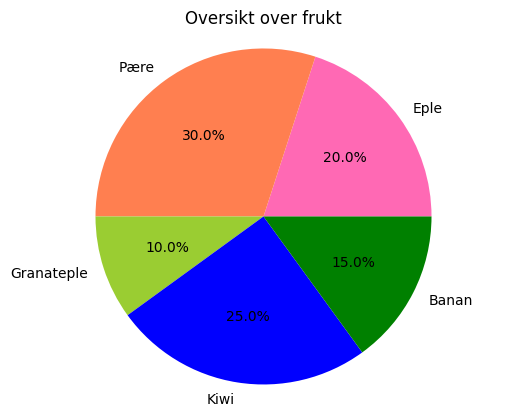

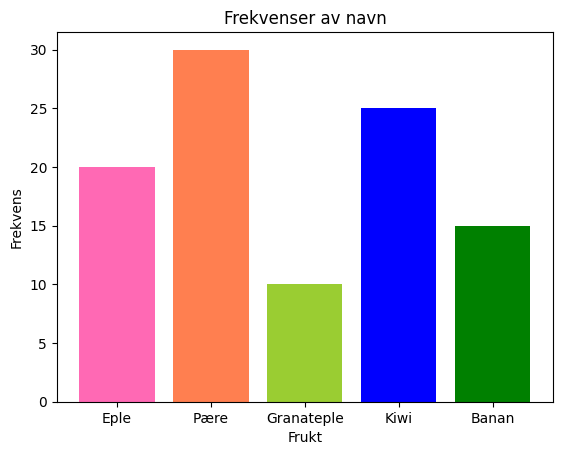

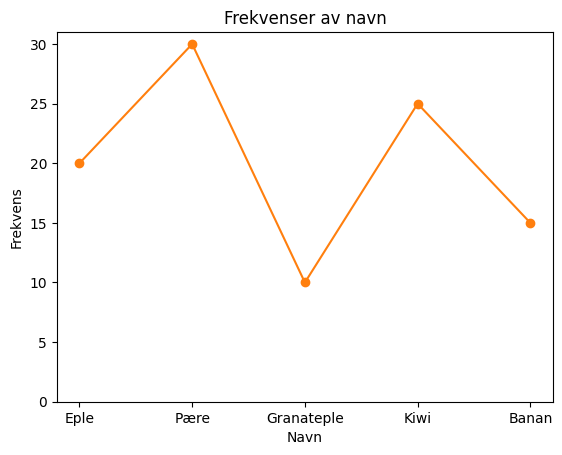

In [11]:
# Søyle, sektor og linjediagram med 1 sett med frekvenser, Farger : https://matplotlib.org/stable/gallery/color/named_colors.html
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["Eple", "Pære", "Granateple", "Kiwi", "Banan"]        # Endre tallene så de passer til din oppgave
frekvenser = [20, 30, 10, 25, 15]                             # Endre tallene så de passer til din oppgave

# Fargevalg
farger = ['hotpink','coral','yellowgreen','b','g']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Oversikt over frukt")                                  # Endre overskriften 
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")                                  # Endre overskriften 
plt.xlabel("Frukt")                                              # Endre x-akse navnet
plt.ylabel("Frekvens")                                           # Endre y-akse navnet
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")                                  # Endre overskriften 
plt.xlabel("Navn")                                               # Endre x-akse navnet
plt.ylabel("Frekvens")                                           # Endre y-akse navnet
plt.ylim(ymin=0)
plt.show()

Gjennomsnittspuls: 116.36363636363636
Hvileperioder (puls < 100):
    Minutt  Slag per minutt
6        6               80
10      10               80


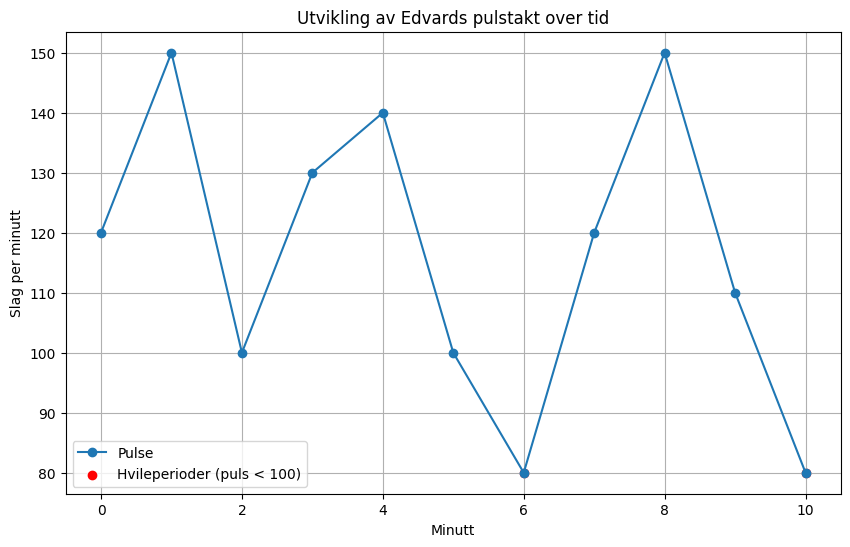

In [1]:
# 4 Statistikk: 4.6 Statistiske beregninger
import pandas as pd
import matplotlib.pyplot as plt

# 1. Datatabell – rediger disse verdiene etter behov
data = {
    'Minutt': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Slag per minutt': [120, 150, 100, 130, 140, 100, 80, 120, 150, 110, 80]
}

df = pd.DataFrame(data)

# 2. Beregning av gjennomsnittspuls
average_pulse = df['Slag per minutt'].mean()
print(f"Gjennomsnittspuls: {average_pulse}")

# 3. Identifisering av hvileperioder (puls < 100)
rest_periods = df[df['Slag per minutt'] < 100]
print("Hvileperioder (puls < 100):")
print(rest_periods)

# 4. Linjediagram med markering av hvileperioder
plt.figure(figsize=(10, 6))
plt.plot(df['Minutt'], df['Slag per minutt'], marker='o', label='Pulse')
plt.scatter(rest_periods['Minutt'], rest_periods['Slag per minutt'], color='red', label='Hvileperioder (puls < 100)')
plt.xlabel('Minutt')
plt.ylabel('Slag per minutt')
plt.title('Utvikling av Edvards pulstakt over tid')
plt.legend()
plt.grid(True)
plt.show()

📊 Statistikkverktøy
1: Kartleggingstest
2: Bysykkeldata


Velg (1/2):  1
Filbane til testresultater (CSV):
>  C:\Users\hanska_a\OneDrive - Akershus fylkeskommune\0Drømtorp 2024-2025 Algebra og funksjoner\Matte\Test_kartlegging (1).csv



🎓 Statistisk analyse av kartleggingsresultater:
------------------------------------------------
Gjennomsnitt:
 Tall          58.76
Brøk          70.88
Prosent       52.24
Algebra       57.68
Funksjoner    68.98
Statistikk    69.50
dtype: float64

Median:
 Tall          57.4
Brøk          74.7
Prosent       54.4
Algebra       66.7
Funksjoner    67.8
Statistikk    74.0
dtype: float64

Typetall (modus):
 Tall          36.0
Brøk          37.0
Prosent       26.3
Algebra       28.4
Funksjoner    37.0
Statistikk    44.8
Name: 0, dtype: float64

Standardavvik:
 Tall          17.517220
Brøk          22.503155
Prosent       27.441811
Algebra       24.649990
Funksjoner    20.742035
Statistikk    20.974628
dtype: float64

Varians:
 Tall          306.853
Brøk          506.392
Prosent       753.053
Algebra       607.622
Funksjoner    430.232
Statistikk    439.935
dtype: float64

Variasjonsbredde:
 Tall          40.4
Brøk          58.3
Prosent       66.2
Algebra       54.7
Funksjoner    54.6
Statis

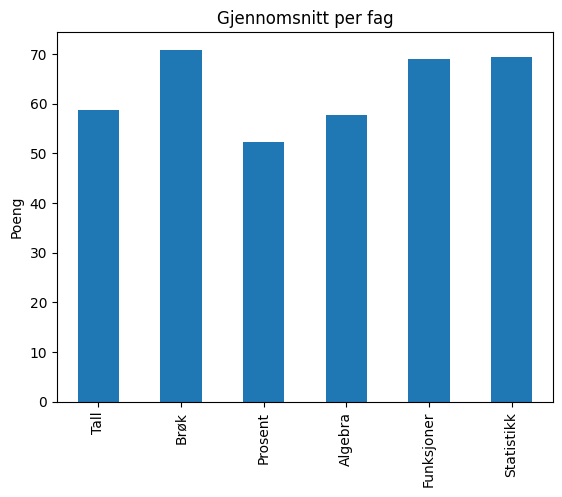

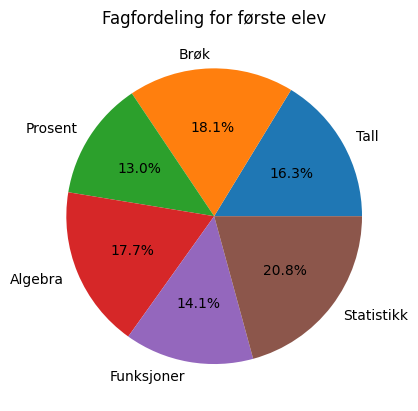

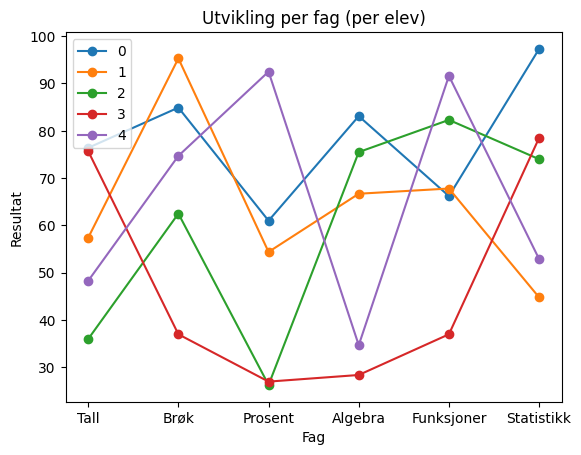


📈 Regresjonsanalyse (elev 1 over fag):
Stigningstall: 2.01
Konstantledd: 73.11
R² (forklaringsgrad): 0.08
Standardfeil: 3.39
95 % konfidensintervall for stigningstall:
  [-4.64, 8.66]


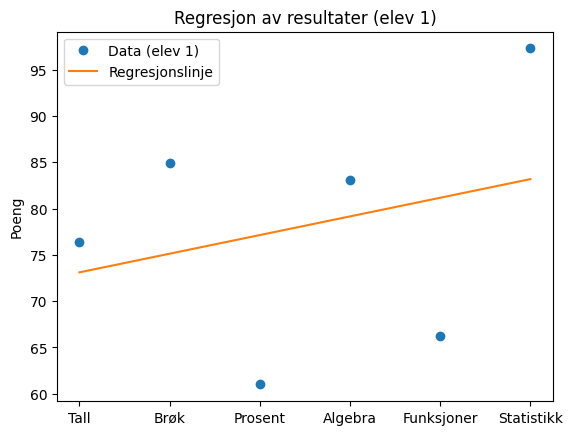

In [2]:
# 4 Statistikk: 4.6 Statistiske beregninger
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# --- Funksjoner ---

def analyser_testresultater(filbane):
    df = pd.read_csv(filbane)
    fagdata = df.iloc[:, 1:]

    print("\n🎓 Statistisk analyse av kartleggingsresultater:")
    print("------------------------------------------------")
    print("Gjennomsnitt:\n", fagdata.mean())
    print("\nMedian:\n", fagdata.median())
    print("\nTypetall (modus):\n", fagdata.mode().iloc[0])
    print("\nStandardavvik:\n", fagdata.std())
    print("\nVarians:\n", fagdata.var())
    print("\nVariasjonsbredde:\n", fagdata.max() - fagdata.min())

    # Frekvenstabeller
    rounded = fagdata.round(-1)
    for kol in rounded.columns:
        print(f"\nFrekvenstabell for {kol}:\n{rounded[kol].value_counts().sort_index()}")

    # Diagrammer
    fagdata.mean().plot(kind='bar', title='Gjennomsnitt per fag')
    plt.ylabel('Poeng')
    plt.show()

    fagdata.iloc[0].plot(kind='pie', autopct='%1.1f%%', title='Fagfordeling for første elev')
    plt.ylabel('')
    plt.show()

    fagdata.T.plot(kind='line', title='Utvikling per fag (per elev)', marker='o')
    plt.xlabel('Fag')
    plt.ylabel('Resultat')
    plt.show()

    # Regresjonsanalyse for én elev (for enkelhets skyld: elev 1)
    fagnavn = fagdata.columns
    x = np.arange(len(fagnavn))
    y = fagdata.iloc[0].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print("\n📈 Regresjonsanalyse (elev 1 over fag):")
    print(f"Stigningstall: {slope:.2f}")
    print(f"Konstantledd: {intercept:.2f}")
    print(f"R² (forklaringsgrad): {r_value**2:.2f}")
    print(f"Standardfeil: {std_err:.2f}")
    print(f"95 % konfidensintervall for stigningstall:")
    ci_lower = slope - 1.96 * std_err
    ci_upper = slope + 1.96 * std_err
    print(f"  [{ci_lower:.2f}, {ci_upper:.2f}]")

    # Tegn regresjonslinje
    y_pred = slope * x + intercept
    plt.plot(fagnavn, y, 'o', label='Data (elev 1)')
    plt.plot(fagnavn, y_pred, '-', label='Regresjonslinje')
    plt.title('Regresjon av resultater (elev 1)')
    plt.ylabel('Poeng')
    plt.legend()
    plt.show()


def analyser_bysykkeldata(filbane):
    df = pd.read_csv(filbane)

    if 'FreeBikes' not in df.columns or 'DockingStation' not in df.columns:
        print("⚠️ Filen mangler nødvendige kolonner (FreeBikes, DockingStation).")
        return

    ledige = df[df['FreeBikes'] > 0]
    print("\n🚲 Analyse av bysykkelstasjoner:")
    print(f"Antall stasjoner med ledige sykler: {len(ledige)}")
    print("\nStasjoner med ledige sykler:")
    print(ledige[['DockingStation', 'FreeBikes']])

    ledige.set_index('DockingStation')['FreeBikes'].plot(kind='bar', title='Ledige sykler per stasjon')
    plt.ylabel('Antall sykler')
    plt.xlabel('Stasjon')
    plt.show()

# --- Meny ---

print("📊 Statistikkverktøy")
print("1: Kartleggingstest")
print("2: Bysykkeldata")

valg = input("Velg (1/2): ")

if valg == '1':
    fil1 = input("Filbane til testresultater (CSV):\n> ")
    analyser_testresultater(fil1)

elif valg == '2':
    fil2 = input("Filbane til bysykkeldata (CSV):\n> ")
    analyser_bysykkeldata(fil2)

else:
    print("Ugyldig valg.")


🧾 Resultater (inkludert statistiske mål):

               Navn  Tall  Brøk  Prosent  Algebra  Funksjoner  Statistikk  Gjennomsnitt  Median  Typetall
      Jeppe Bjerget  76.4  84.9     61.0     83.1        66.2        97.3     78.150000   79.75      61.0
        Tine Finden  57.4  95.3     54.4     66.7        67.8        44.8     64.400000   62.05      44.8
       Gard R. Moen  36.0  62.5     26.3     75.5        82.3        74.0     59.433333   68.25      26.3
 Sølvi Normalbakken  75.7  37.0     27.0     28.4        37.0        78.5     47.266667   37.00      37.0
Lillebror Stordalen  48.3  74.7     92.5     34.7        91.6        52.9     65.783333   63.80      34.7

📊 Diagrammer for Jeppe Bjerget


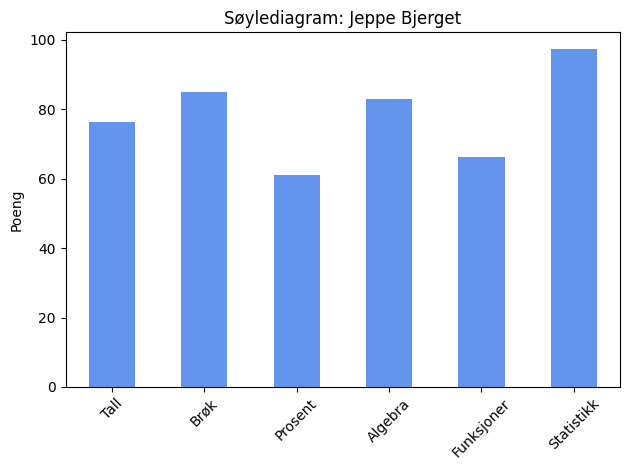

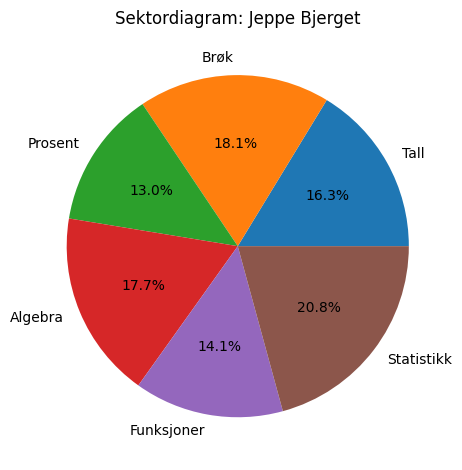

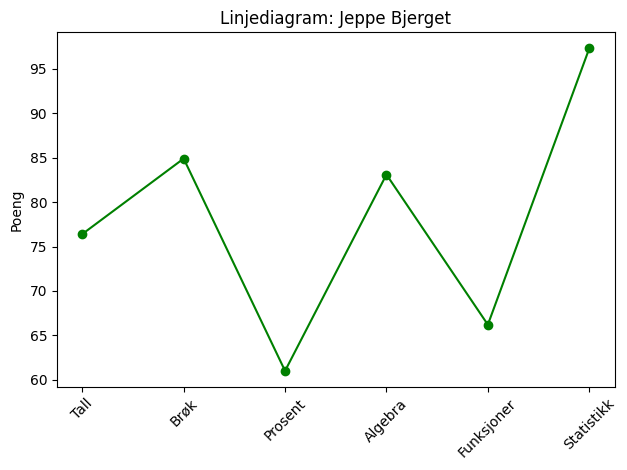


📊 Diagrammer for Tine Finden


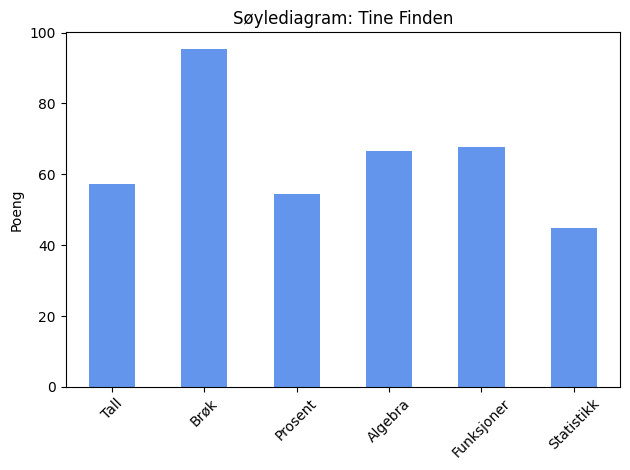

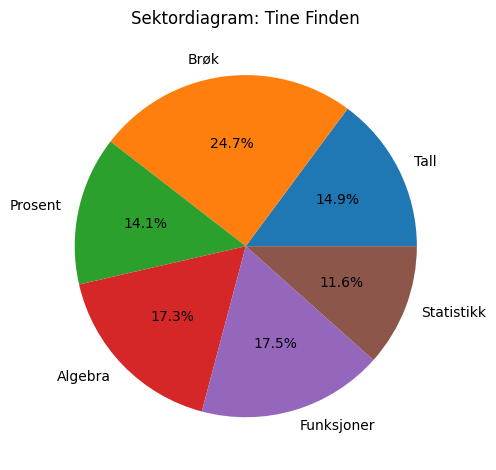

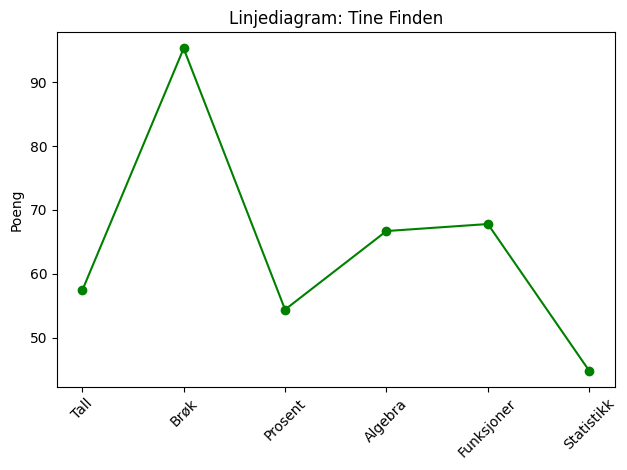


📊 Diagrammer for Gard R. Moen


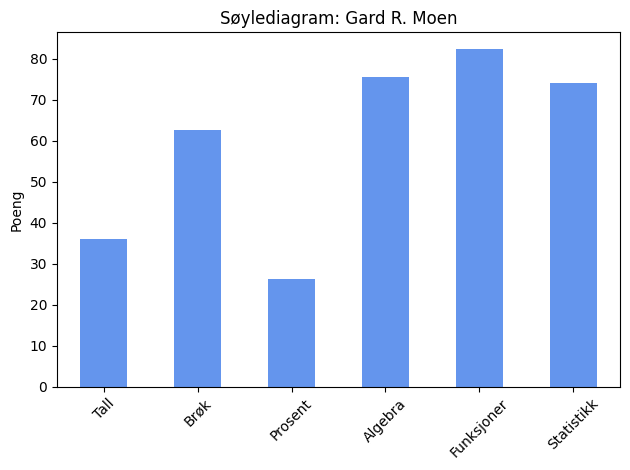

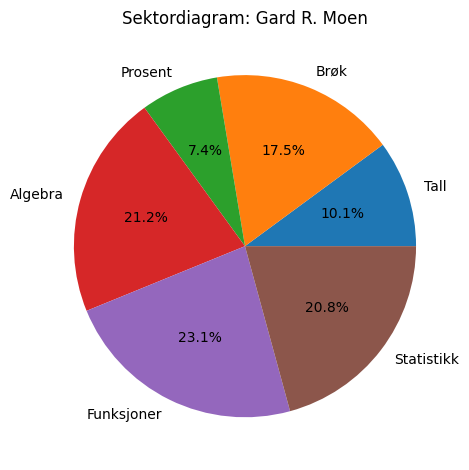

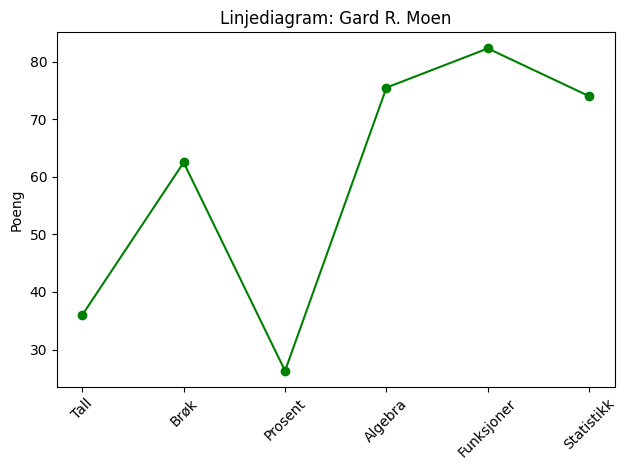


📊 Diagrammer for Sølvi Normalbakken


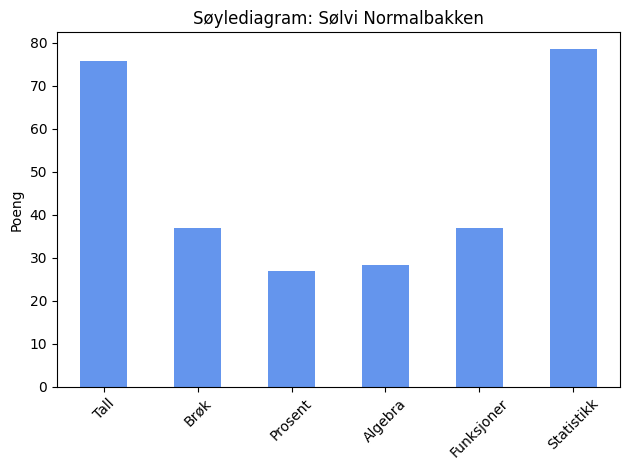

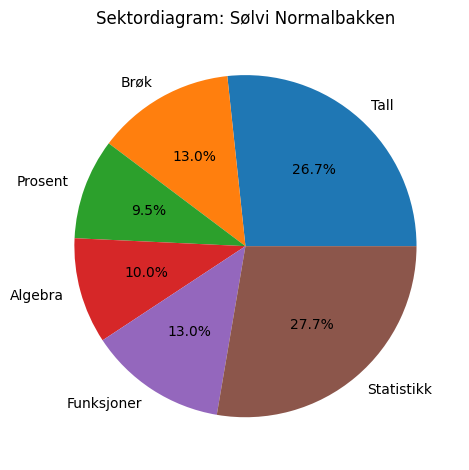

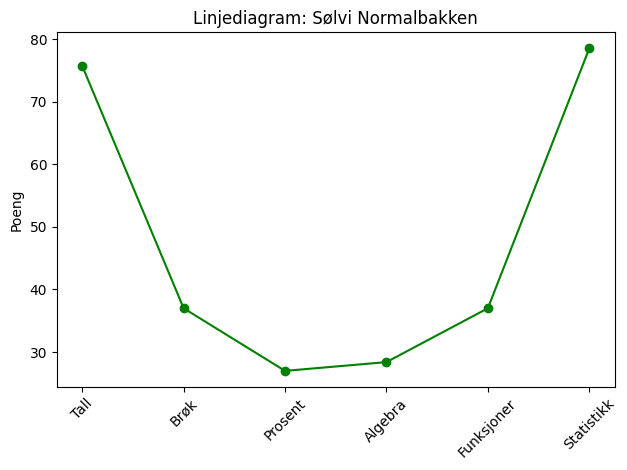


📊 Diagrammer for Lillebror Stordalen


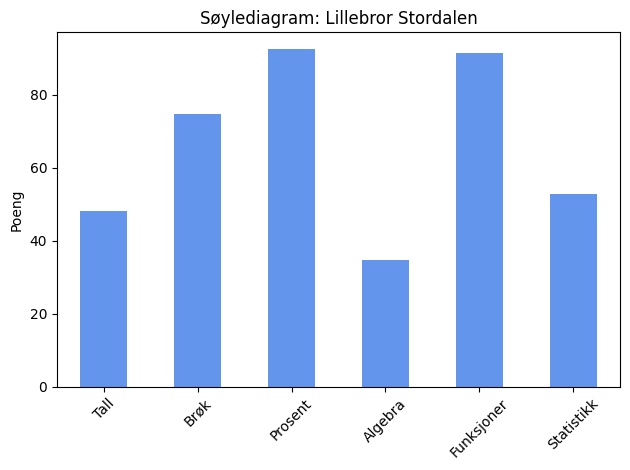

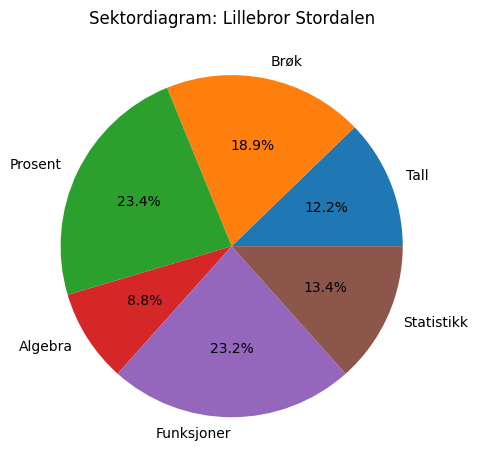

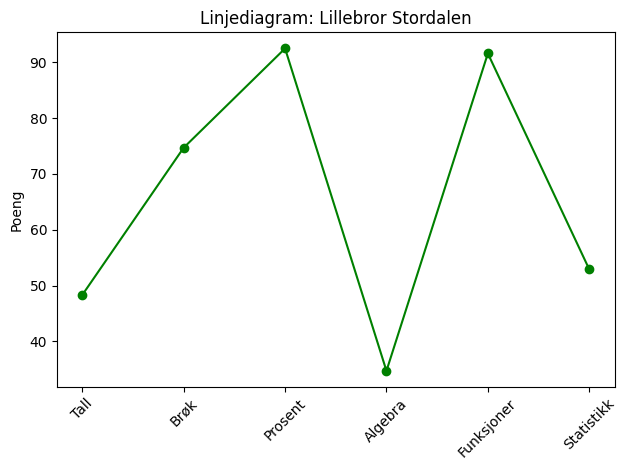

In [6]:
# 4 Statistikk: 4.6 Statistiske beregninger
import pandas as pd
import matplotlib.pyplot as plt

# Filbane til din CSV-fil
filbane = r'C:\Users\hanska_a\OneDrive - Akershus fylkeskommune\0Drømtorp 2024-2025 Algebra og funksjoner\Matte\Test_kartlegging (1).csv'

# Les inn data
try:
    df = pd.read_csv(filbane)
except:
    df = pd.read_csv(filbane, sep=';')

# Fjern mellomrom i kolonnenavn hvis nødvendig
df.columns = df.columns.str.strip()

# Fagkolonner (alle unntatt Navn)
fagkolonner = df.columns[1:]

# Beregninger
df['Gjennomsnitt'] = df[fagkolonner].mean(axis=1)
df['Median'] = df[fagkolonner].median(axis=1)
df['Typetall'] = df[fagkolonner].mode(axis=1)[0]

# 📋 Skriv ut hele tabellen med alt inkludert
print("\n🧾 Resultater (inkludert statistiske mål):\n")
print(df.to_string(index=False))

# 📊 Lag grafer for hver elev
for i, rad in df.iterrows():
    navn = rad['Navn']
    fagverdier = rad[fagkolonner].astype(float)  # Sikrer riktig datatype

    print(f"\n📊 Diagrammer for {navn}")

    # Søyle
    fagverdier.plot(kind='bar', title=f'Søylediagram: {navn}', ylabel='Poeng', color='cornflowerblue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Sektor
    plt.figure()
    fagverdier.plot.pie(title=f'Sektordiagram: {navn}', autopct='%1.1f%%')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Linje
    fagverdier.plot(kind='line', title=f'Linjediagram: {navn}', marker='o', linestyle='-', color='green')
    plt.ylabel('Poeng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# $\color{red}{\text{Kapittel 5 - Yrkesøkonomi}}$

In [ ]:
# 5 Yrkesøkonomi: 5.2 Merverdiavgift
# 5.2 Merverdiavgift beregning: Pris uten MVA = Pris med MVA/Vekstfaktoren 
def beregn_pris_uten_mva(pris_med_mva, vekstfaktor):
    return pris_med_mva / vekstfaktor

def beregn_pris_med_mva(pris_uten_mva, vekstfaktor):
    return pris_uten_mva * vekstfaktor

def beregn_vekstfaktor(pris_med_mva, pris_uten_mva):
    return pris_med_mva / pris_uten_mva

def velg_vekstfaktor():
    print("Velg MVA-sats:")
    print("1. 25% (For de fleste varer eller tjenester)")
    print("2. 15% (For mat og drikke)")
    print("3. 12% (For persontransport, kinobilletter og utleie av rom)")
    print("4. 0% (Helsetjenester, undervisningstjenester og kulturelle tjenester)")
    
    valg = input("Velg et alternativ (1/2/3/4): ").strip()
    if valg == '1':
        return 1.25
    elif valg == '2':
        return 1.15
    elif valg == '3':
        return 1.12
    elif valg == '4':
        return 1.00
    else:
        print("Ugyldig valg. Standard vekstfaktor 1.25 (25%) brukes.")
        return 1.25

def hovedprogram():
    while True:
        print("\nVelkommen til MVA kalkulator!")
        print("Trykk 'q' for å avslutte programmet.\n")
       
        print("Velg en beregning:")
        print("1. Pris uten MVA")
        print("2. Pris med MVA")
        print("3. Vekstfaktoren")

        choice = input("Velg et alternativ (1/2/3/q): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break

        try:
            if choice == '1':
                pris_med_mva = float(input("\nOppgi prisen med MVA: "))
                vekstfaktor = velg_vekstfaktor()
                pris_uten_mva = beregn_pris_uten_mva(pris_med_mva, vekstfaktor)
                resultat = f"\nPrisen uten MVA er {round(pris_uten_mva, 2)}"
            elif choice == '2':
                pris_uten_mva = float(input("\nOppgi prisen uten MVA: "))
                vekstfaktor = velg_vekstfaktor()
                pris_med_mva = beregn_pris_med_mva(pris_uten_mva, vekstfaktor)
                mva_belop = pris_med_mva - pris_uten_mva
                resultat = (
                    f"\nPrisen med MVA er {round(pris_med_mva, 2)}"
                    f"\nMerverdiavgiften utgjør {round(mva_belop, 2)}"
                )
            elif choice == '3':
                pris_med_mva = float(input("\nOppgi prisen med MVA: "))
                pris_uten_mva = float(input("Oppgi prisen uten MVA: "))
                vekstfaktor = beregn_vekstfaktor(pris_med_mva, pris_uten_mva)
                resultat = f"\nVekstfaktoren er {round(vekstfaktor, 2)}"
            else:
                resultat = "\nUgyldig valg. Vennligst oppgi 1, 2 eller 3."
        except ValueError:
            resultat = "\nUgyldig inndata. Vennligst oppgi et tall."

        print(resultat)

if __name__ == "__main__":
    hovedprogram()

In [ ]:
# 5 Yrkesøkonomi: 5.3 Priskalkyler
# Priskalkyle Oppgave 7.133a:

materialkostnad_per_kort = 23         # Pris per takkekort
antall_kort = 20                       # Antall takkekort kunden ønsker
indirekte_kostnader = 1100            # Faste kostnader som strøm, husleie osv.
fortjeneste_prosent = 0.41            # Ønsket fortjeneste (41 %)
mva = 0.25                             # Merverdiavgift (25 %)

# Lønnskostnader
timelønn = 350                         # Grunnlønn per time
overtidssats = timelønn * 1.25         # Overtidstillegg (25 % ekstra)
timer_fotografering = 3               # Antall timer brukt på fotografering
timer_redigering = 5                  # Antall timer brukt på redigering og etterarbeid

# Beregner lønnskostnader
lønn_fotografering = timer_fotografering * overtidssats
lønn_redigering = timer_redigering * timelønn
total_lønn = lønn_fotografering + lønn_redigering

# Beregner materialkostnader
total_materialkostnad = materialkostnad_per_kort * antall_kort

# Beregner selvkost (alle kostnader før fortjeneste og mva)
selvkost = total_materialkostnad + total_lønn + indirekte_kostnader

# Legger til fortjeneste
pris_med_fortjeneste = selvkost * (1 + fortjeneste_prosent)

# Legger til merverdiavgift
sluttpris = pris_med_fortjeneste * (1 + mva)

# Skriver ut en oversikt over alle kostnader og sluttpris
print("Kostnadsoversikt:")
print(f"Materialkostnader: {total_materialkostnad} kr")
print(f"Lønnskostnader: {total_lønn} kr")
print(f"Indirekte kostnader: {indirekte_kostnader} kr")
print(f"Selvkost: {selvkost} kr")
print(f"Pris med fortjeneste: {pris_med_fortjeneste:.2f} kr")
print(f"Sluttpris inkl. mva: {round(sluttpris)} kr")

In [ ]:
# 5 Yrkesøkonomi: 5.3 Priskalkyler
import re

# Evaluerer trygge matematiske uttrykk
def evaluer_uttrykk(uttrykk):
    uttrykk = uttrykk.replace(' ', '')
    if re.match(r'^[0-9\.\*\+\-/()]+$', uttrykk):
        return eval(uttrykk)
    else:
        raise ValueError("Ugyldig uttrykk")

# Henter og validerer kostnader og lønn
def hent_kostnader():
    print("\nOppgi kostnader – (skriv 'q' for å avslutte):")
    while True:
        try:
            direkte_input = input("Direkte kostnader/Materialkostnader (uten mva.) (feks råvarer): ").strip().lower()
            if direkte_input == 'q':
                return None
            direkte = evaluer_uttrykk(direkte_input)
            if direkte < 0:
                raise ValueError

            indirekte_input = input("Indirekte kostnader (feks husleie, strøm): ").strip().lower()
            if indirekte_input == 'q':
                return None
            indirekte = evaluer_uttrykk(indirekte_input)
            if indirekte < 0:
                raise ValueError

            # NYTT: Velg metode for lønnskostnader
            print("\nVil du oppgi lønnskostnader direkte, eller beregne dem?")
            lønn_valg = input("Skriv 'j' for å oppgi direkte lønnskostnader, eller 'n' for å beregne ut fra timelønn og minutter brukt: ").strip().lower()
            if lønn_valg == 'q':
                return None

            if lønn_valg == 'j':
                lønn_input = input("Oppgi lønnskostnader direkte (kr): ").strip().lower()
                if lønn_input == 'q':
                    return None
                lønn = evaluer_uttrykk(lønn_input)
                if lønn < 0:
                    raise ValueError

            elif lønn_valg == 'n':
                timelønn_input = input("Oppgi timelønn (kr/t): ").strip().lower()
                if timelønn_input == 'q':
                    return None
                timelønn = evaluer_uttrykk(timelønn_input)
                if timelønn < 0:
                    raise ValueError

                minutter_input = input("Hvor mange minutter er brukt av timen til arbeidet? ").strip().lower()
                if minutter_input == 'q':
                    return None
                minutter = evaluer_uttrykk(minutter_input)
                if minutter < 0:
                    raise ValueError

                lønn = timelønn * (minutter / 60)

            else:
                print("Ugyldig valg. Skriv 'j' for ja, 'n' for nei, eller 'q' for å avslutte.")
                continue

            return direkte + indirekte + lønn

        except ValueError:
            print("Ugyldig inndata. Vennligst oppgi et gyldig POSITIVT tall eller uttrykk – eller 'q' for å avslutte.")


def velg_vekstfaktor():
    print("\nVelg MVA-sats (skriv 'q' for å avslutte):")
    print("1. 25% (For de fleste varer eller tjenester)")
    print("2. 15% (Næringsmidler, altså mat og drikke)")
    print("3. 12% (For persontransport, kinobilletter, Inngangsbilletter til museer, gallerier, o.l., overnatting og utleie av rom)")
    print("4. 0% (Helsetjenester, undervisningstjenester og kulturelle tjenester)")
    
    while True:
        valg = input("Velg et alternativ (1/2/3/4): ").strip().lower()
        if valg == 'q':
            return None
        vekstfaktorer = {
            '1': 1.25,
            '2': 1.15,
            '3': 1.12,
            '4': 1.00
        }
        if valg in vekstfaktorer:
            return vekstfaktorer[valg]
        else:
            print("Ugyldig valg. Velg 1, 2, 3 eller 4 – eller 'q' for å avslutte.")

def beregn_pris():
    selvkost = hent_kostnader()
    if selvkost is None:
        print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
        return True  # signaliser at programmet skal avsluttes

    # Hvis selvkost er 0, gi mulighet til å skrive det inn manuelt
    if selvkost == 0:
        svar = input("\nSelvkost er 0 kr. Vil du skrive inn en selvkost manuelt? (j/n): ").strip().lower()
        if svar == 'j':
            while True:
                manuelt_input = input("Oppgi ønsket selvkost (kr): ").strip().lower()
                if manuelt_input == 'q':
                    print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
                    return True
                try:
                    manuelt_beløp = evaluer_uttrykk(manuelt_input)
                    if manuelt_beløp > 0:
                        selvkost = manuelt_beløp
                        break
                    else:
                        print("Selvkost må være et positivt tall.")
                except ValueError:
                    print("Ugyldig verdi. Prøv igjen.")
        else:
            print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
            return True

    # Spør om bruker vil gå videre
    svar = input(f"\nSelvkost er beregnet til {selvkost:.2f} kr. Vil du gå videre og legge til fortjeneste? (j/n): ").strip().lower()
    if svar != 'j':
        print("Avslutter beregningen. Takk for at du brukte priskalkulatoren!")
        return True

    while True:
        try:
            fortjeneste_input = input("\nØnsket fortjeneste i prosent (%): ").strip().lower()
            if fortjeneste_input == 'q':
                print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
                return True
            fortjeneste_prosent = evaluer_uttrykk(fortjeneste_input)
            if fortjeneste_prosent < 0:
                print("Fortjenesteprosent kan ikke være negativ.")
                continue
            break
        except ValueError:
            print("Ugyldig inndata. Vennligst oppgi et positivt tall eller 'q' for å avslutte.")

    fortjeneste = selvkost * (fortjeneste_prosent / 100)
    pris_uten_mva = selvkost + fortjeneste

    vekstfaktor = velg_vekstfaktor()
    if vekstfaktor is None:
        print("\nAvslutter programmet. Takk for at du brukte priskalkulatoren!")
        return True

    pris_med_mva = pris_uten_mva * vekstfaktor
    mva_beløp = pris_med_mva - pris_uten_mva

    print("\n--- Priskalkyle ---")
    print(f"Summen av kostnader/selvkosten er: {selvkost:.2f} kr")
    print(f"Fortjenesten i ({fortjeneste_prosent}%) er: {fortjeneste:.2f} kr")
    print(f"Prisen uten merverdiavgift er: {pris_uten_mva:.2f} kr")
    print(f"Merverdiavgiften er: {mva_beløp:.2f} kr")
    print(f"Prisen med merverdiavgift er: {pris_med_mva:.2f} kr")

    return False  # fortsett programmet

def hovedmeny():
    avslutt = False
    while not avslutt:
        avslutt = beregn_pris()
        if not avslutt:
            while True:
                igjen = input("\nVil du gjøre en ny beregning? (j = ja / q = avslutt): ").strip().lower()
                if igjen == 'j':
                    break
                elif igjen == 'q':
                    print("Takk for at du brukte priskalkulatoren!")
                    avslutt = True
                    break
                else:
                    print("Ugyldig valg. Skriv 'j' for ja eller 'q' for avslutt.")

# Start programmet
hovedmeny()

In [ ]:
# 5 Yrkesøkonomi: 5.5 Anbud
def calculate_bid():
    while True:
        print("\n--- Anbudsberegning ---")
        avslutt = input("Trykk 'q' for å avslutte eller Enter for å fortsette: ")
        if avslutt.lower() == 'q':
            print("Programmet er avsluttet.")
            break

        try:
            innkjopssum_uten_mva = eval(input("Innkjøpssum uten mva (f.eks. 5*100): "))
            fortjeneste_prosent = eval(input("Fortjeneste i prosent (f.eks. 80): "))
            lonnskostnader = eval(input("Lønnskostnader (f.eks. 10*500): "))
            mva_sats = eval(input("Merverdiavgift i prosent (f.eks. 25): "))

            fortjeneste = innkjopssum_uten_mva * (fortjeneste_prosent / 100)
            utsalgssum = innkjopssum_uten_mva + fortjeneste
            pris_uten_mva = utsalgssum + lonnskostnader
            mva_belop = pris_uten_mva * (mva_sats / 100)
            pris_med_mva = pris_uten_mva + mva_belop
            inntekt_til_bedriften = pris_uten_mva - innkjopssum_uten_mva

            print("\n--- Resultat ---")
            print(f"Utsalgssum (materialer, råvarer): {utsalgssum:.2f} kr")
            print(f"Pris uten merverdiavgift: {pris_uten_mva:.2f} kr")
            print(f"Merverdiavgift: {mva_belop:.2f} kr")
            print(f"Pris med merverdiavgift: {pris_med_mva:.2f} kr")
            print(f"Inntekten til bedriften: {inntekt_til_bedriften:.2f} kr")

            print("\nUlemper med for lavt anbud:")
            print("- Risiko for underskudd")
            print("- Manglende dekning av uforutsette kostnader")
            print("- Redusert kvalitet på arbeidet")

            print("\nUlemper med for høyt anbud:")
            print("- Risiko for å miste kunden")
            print("- Redusert konkurranseevne")
            print("- Oppfattes som overpriset")

        except Exception as e:
            print(f"Feil i input: {e}. Prøv igjen.")

# Kjør funksjonen i en celle i Jupyter Notebook
calculate_bid()

In [38]:
# 5 Yrkesøkonomi: 5.6 Velferdsteknologi
STANDARD_TIMELØNN = 340

def spør_om_timelønn():
    svar = input("Vil du oppgi timelønn? (ja/nei): ").strip().lower()
    if svar == 'ja':
        return float(input("Skriv inn timelønn (kr): "))
    else:
        print(f"Standard timelønn brukes: {STANDARD_TIMELØNN} kr")
        return STANDARD_TIMELØNN

def beregn_sykefravær_besparelse(tidligere_prosent, ny_prosent, årsverk, timer_per_årsverk, timelønn):
    totale_timer = årsverk * timer_per_årsverk
    forskjell_i_prosent = (tidligere_prosent - ny_prosent) / 100
    sparte_timer = forskjell_i_prosent * totale_timer
    sparte_kroner = sparte_timer * timelønn
    return round(sparte_timer), round(sparte_kroner)

def beregn_investering_lønnsomhet(antall_pasienter, kostnad_per_enhet, spart_tid_per_dag, årslønn, arbeidstimer_per_år):
    gjennomsnittlig_timelønn = årslønn / arbeidstimer_per_år
    total_spart_tid_per_år = (spart_tid_per_dag / 60) * 365 * antall_pasienter
    totale_besparelser_per_år = total_spart_tid_per_år * gjennomsnittlig_timelønn
    total_investering_kostnad = antall_pasienter * kostnad_per_enhet
    netto_besparelser = totale_besparelser_per_år - total_investering_kostnad
    return netto_besparelser

def beregn_tid_og_kostnad(besøk_per_uke, minutter_spart_per_besøk, timelønn, låskostnad):
    besøk_per_år = besøk_per_uke * 52
    total_spart_tid_minutter = besøk_per_år * minutter_spart_per_besøk
    total_spart_tid_timer = total_spart_tid_minutter / 60
    spart_kroner = total_spart_tid_timer * timelønn
    netto_besparelse = spart_kroner - låskostnad
    return round(total_spart_tid_timer, 2), round(spart_kroner, 2), round(netto_besparelse, 2)

def beregn_tilbakebetalingstid(besøk_per_uke, minutter_spart_per_besøk, timelønn, låskostnad):
    spart_per_uke = (minutter_spart_per_besøk / 60) * besøk_per_uke * timelønn
    if spart_per_uke == 0:
        return float('inf')
    return round(låskostnad / spart_per_uke)

def beregn_dusjtoalett_besparelse(antall_beboere, andel_med_behov, minutter_spart_per_dag, dager_per_år):
    brukere_med_behov = antall_beboere * andel_med_behov
    timer_spart_per_dag = (minutter_spart_per_dag / 60) * brukere_med_behov
    timer_spart_per_år = timer_spart_per_dag * dager_per_år
    return round(timer_spart_per_år, 2)

def beregn_tilbakebetalingstid_dusjtoalett(totalkostnad, timer_spart_per_år, timelønn):
    spart_kroner_per_år = timer_spart_per_år * timelønn
    if spart_kroner_per_år == 0:
        return float('inf'), 0
    år = totalkostnad / spart_kroner_per_år
    måneder = år * 12
    return round(måneder, 1), round(spart_kroner_per_år, 2)

def maks_toaletter_for_nullresultat(spart_kroner_per_år, kostnad_per_toalett):
    if kostnad_per_toalett == 0:
        return float('inf')
    maks_toaletter = spart_kroner_per_år // kostnad_per_toalett
    return int(maks_toaletter)

def beregn_generell_investering(antall_enheter, kostnad_per_enhet, spart_timer_per_år, timelønn):
    investering = antall_enheter * kostnad_per_enhet
    besparelse = spart_timer_per_år * timelønn
    netto = besparelse - investering
    tilbakebetalingstid = investering / besparelse if besparelse > 0 else float('inf')
    return investering, besparelse, netto, tilbakebetalingstid

def hovedprogram():
    while True:
        print("\nVelg beregningstype:")
        print("1. Beregn besparelse ved redusert sykefravær")
        print("2. Beregn lønnsomhet ved investering i velferdsteknologi")
        print("3. Beregn besparelse og tilbakebetalingstid for elektronisk dørlås")
        print("4. Beregn besparelse og lønnsomhet for dusjtoaletter")
        print("5. Generell investering og besparelsesanalyse (f.eks. løfteheis)")
        print("Trykk 'q' for å avslutte.")
        valg = input("Ditt valg: ")

        if valg == 'q':
            print("Avslutter programmet.")
            break

        elif valg == '1':
            tidligere_prosent = float(input("Tidligere sykefraværsprosent: "))
            ny_prosent = float(input("Ny sykefraværsprosent: "))
            årsverk = int(input("Antall årsverk: "))
            timer_per_årsverk = int(input("Timer per årsverk: "))
            timelønn = spør_om_timelønn()

            sparte_timer, sparte_kroner = beregn_sykefravær_besparelse(
                tidligere_prosent, ny_prosent, årsverk, timer_per_årsverk, timelønn
            )
            print(f"\nSparte timer per år: {sparte_timer}")
            print(f"Sparte kroner per år: {sparte_kroner} kr")

        elif valg == '2':
            antall_pasienter = int(input("Antall pasienter: "))
            kostnad_per_enhet = float(input("Kostnad per enhet (kr): "))
            spart_tid_per_dag = float(input("Spart tid per dag per pasient (minutter): "))
            årslønn = float(input("Årslønn per ansatt (kr): "))
            arbeidstimer_per_år = float(input("Antall arbeidstimer per år: "))

            netto_besparelser = beregn_investering_lønnsomhet(
                antall_pasienter, kostnad_per_enhet, spart_tid_per_dag, årslønn, arbeidstimer_per_år
            )

            if netto_besparelser > 0:
                print(f"\nInvesteringen er lønnsom. Netto besparelser i løpet av ett år: {netto_besparelser:.2f} kr")
            else:
                print(f"\nInvesteringen er ikke lønnsom. Netto tap i løpet av ett år: {abs(netto_besparelser):.2f} kr")

        elif valg == '3':
            besøk_per_uke = int(input("Antall ukentlige besøk: "))
            minutter_spart_per_besøk = float(input("Tid spart per besøk (minutter): "))
            timelønn = spør_om_timelønn()
            låskostnad = float(input("Kostnad for elektronisk dørlås (kr): "))

            timer_spart, kroner_spart, netto = beregn_tid_og_kostnad(
                besøk_per_uke, minutter_spart_per_besøk, timelønn, låskostnad
            )
            uker_tilbakebetaling = beregn_tilbakebetalingstid(
                besøk_per_uke, minutter_spart_per_besøk, timelønn, låskostnad
            )

            print(f"\nÅrlig spart tid: {timer_spart} timer")
            print(f"Årlig spart beløp: {kroner_spart:.2f} kr")
            print(f"Netto besparelse første år (etter låskostnad): {netto:.2f} kr")
            print(f"Antall uker før investeringen er spart inn: {uker_tilbakebetaling} uker")

        elif valg == '4':
            antall_beboere = int(input("Antall beboere: "))
            andel_med_behov = float(input("Andel med behov (f.eks. 0.6 for 60%): "))
            minutter_spart_per_dag = float(input("Minutter spart per dag per bruker: "))
            dager_per_år = 365
            antall_toaletter = int(input("Antall toaletter som skal byttes: "))
            kostnad_per_toalett = float(input("Kostnad per dusjtoalett (kr): "))
            timelønn = spør_om_timelønn()

            timer_spart_per_år = beregn_dusjtoalett_besparelse(
                antall_beboere, andel_med_behov, minutter_spart_per_dag, dager_per_år
            )
            totalkostnad = antall_toaletter * kostnad_per_toalett
            måneder, spart_kroner_per_år = beregn_tilbakebetalingstid_dusjtoalett(
                totalkostnad, timer_spart_per_år, timelønn
            )
            maks_toaletter = maks_toaletter_for_nullresultat(spart_kroner_per_år, kostnad_per_toalett)

            print(f"\nÅrlig spart tid: {timer_spart_per_år} timer")
            print(f"Årlig spart beløp: {spart_kroner_per_år:.2f} kr")
            print(f"Tid før investeringen er spart inn: {måneder} måneder")
            print(f"Maksimalt antall toaletter som kan kjøpes for å gå i null på ett år: {maks_toaletter}")

        elif valg == '5':
            print("\nGenerell investering – for eksempel løfteheis")

            antall_enheter = int(input("Antall enheter som skal kjøpes (f.eks. 2 løfteheiser): "))
            kostnad_per_enhet = float(input("Kostnad per enhet (kr): "))
            spart_timer_per_år = float(input("Forventet spart tid totalt per år (timer): "))
            timelønn = spør_om_timelønn()

            investering, besparelse, netto, tilbakebetalingstid = beregn_generell_investering(
                antall_enheter, kostnad_per_enhet, spart_timer_per_år, timelønn
            )

            print(f"\nTotal investering: {investering:.2f} kr")
            print(f"Forventet årlig besparelse: {besparelse:.2f} kr")
            print(f"Netto resultat etter ett år: {'+' if netto >= 0 else ''}{netto:.2f} kr")
            print(f"Tilbakebetalingstid: {tilbakebetalingstid:.2f} år")

        else:
            print("Ugyldig valg. Prøv igjen.")

if __name__ == "__main__":
    hovedprogram()


Velg beregningstype:
1. Beregn besparelse ved redusert sykefravær
2. Beregn lønnsomhet ved investering i velferdsteknologi
3. Beregn besparelse og tilbakebetalingstid for elektronisk dørlås
4. Beregn besparelse og lønnsomhet for dusjtoaletter
5. Generell investering og besparelsesanalyse (f.eks. løfteheis)
Trykk 'q' for å avslutte.


Ditt valg:  5



Generell investering – for eksempel løfteheis


Antall enheter som skal kjøpes (f.eks. 2 løfteheiser):  2
Kostnad per enhet (kr):  60000
Forventet spart tid totalt per år (timer):  461.5
Vil du oppgi timelønn? (ja/nei):  ja
Skriv inn timelønn (kr):  340



Total investering: 120000.00 kr
Forventet årlig besparelse: 156910.00 kr
Netto resultat etter ett år: +36910.00 kr
Tilbakebetalingstid: 0.76 år

Velg beregningstype:
1. Beregn besparelse ved redusert sykefravær
2. Beregn lønnsomhet ved investering i velferdsteknologi
3. Beregn besparelse og tilbakebetalingstid for elektronisk dørlås
4. Beregn besparelse og lønnsomhet for dusjtoaletter
5. Generell investering og besparelsesanalyse (f.eks. løfteheis)
Trykk 'q' for å avslutte.


Ditt valg:  q


Avslutter programmet.
